In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix
from folium import Map
from folium.plugins import HeatMap
import geopandas as gpd
from shapely.geometry import Point
import datetime
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MultiLabelBinarizer
from statsmodels.tsa.seasonal import seasonal_decompose
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from copy import deepcopy

In [8]:
df = pd.read_csv("crime_data.csv")
df.head()

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
0,2012/13,1,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,20323
1,2012/13,1,Avon and Somerset,Abandoning child under two years (outcomes only),Violence against the person,Violence without injury,12,0
2,2012/13,1,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes against society,Miscellaneous crimes against society,80,1
3,2012/13,1,Avon and Somerset,Abuse of children through prostitution and por...,Sexual offences,Other sexual offences,71,0
4,2012/13,1,Avon and Somerset,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences,73,3


In [10]:
df.isnull().sum()

Financial Year         0
Financial Quarter      0
Force Name             0
Offence Description    0
Offence Group          0
Offence Subgroup       0
Offence Code           0
Number of Offences     0
dtype: int64

In [11]:
df.columns.tolist()


['Financial Year',
 'Financial Quarter',
 'Force Name',
 'Offence Description',
 'Offence Group',
 'Offence Subgroup',
 'Offence Code',
 'Number of Offences']

In [12]:
df.shape

(302876, 8)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302876 entries, 0 to 302875
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Financial Year       302876 non-null  object
 1   Financial Quarter    302876 non-null  int64 
 2   Force Name           302876 non-null  object
 3   Offence Description  302876 non-null  object
 4   Offence Group        302876 non-null  object
 5   Offence Subgroup     302876 non-null  object
 6   Offence Code         302876 non-null  object
 7   Number of Offences   302876 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 18.5+ MB


C:\Users\Salman\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Salman\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Salman\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


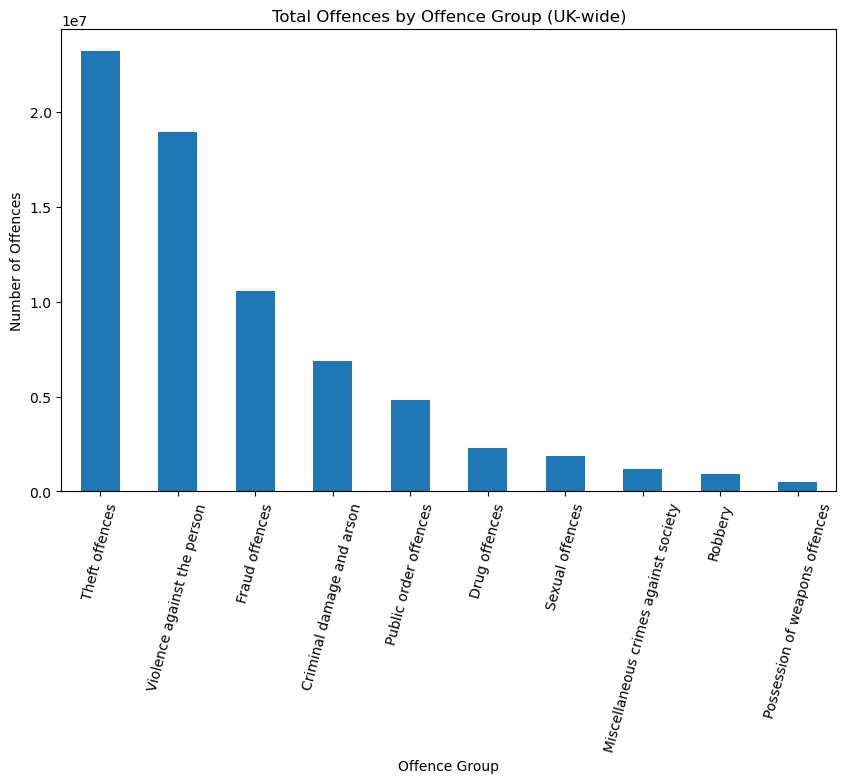

In [19]:
group_counts = df.groupby("Offence Group")["Number of Offences"].sum().sort_values(ascending=False)

yearly_trends = df.groupby("Financial Year")["Number of Offences"].sum()

force_counts = df.groupby("Force Name")["Number of Offences"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
group_counts.plot(kind="bar")
plt.title("Total Offences by Offence Group (UK-wide)")
plt.ylabel("Number of Offences")
plt.xticks(rotation=75)
plt.show()



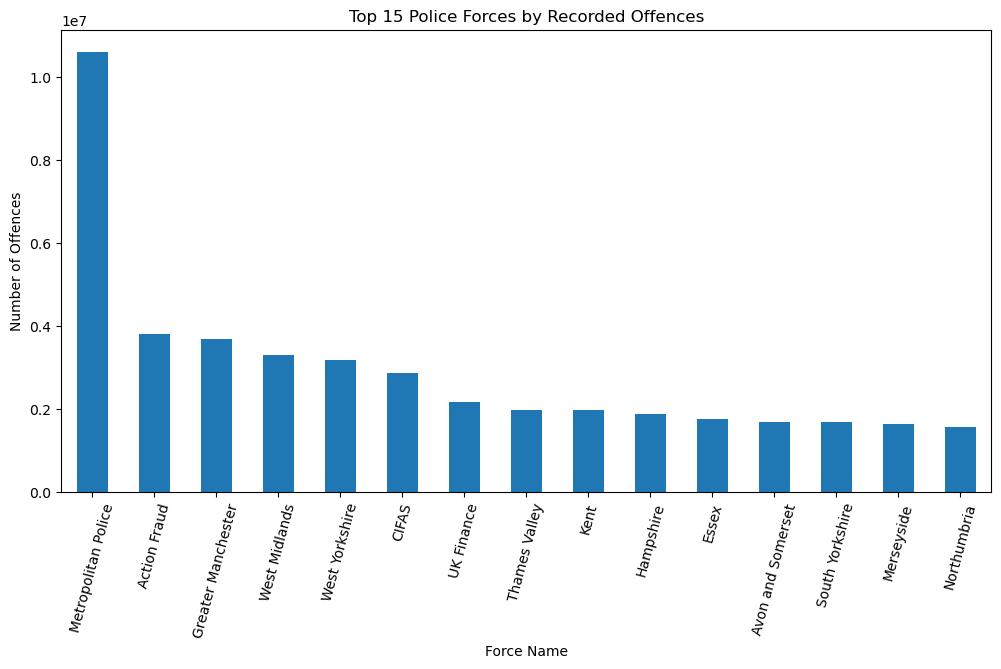

In [20]:
plt.figure(figsize=(12,6))
force_counts.head(15).plot(kind="bar")
plt.title("Top 15 Police Forces by Recorded Offences")
plt.ylabel("Number of Offences")
plt.xticks(rotation=75)
plt.show()


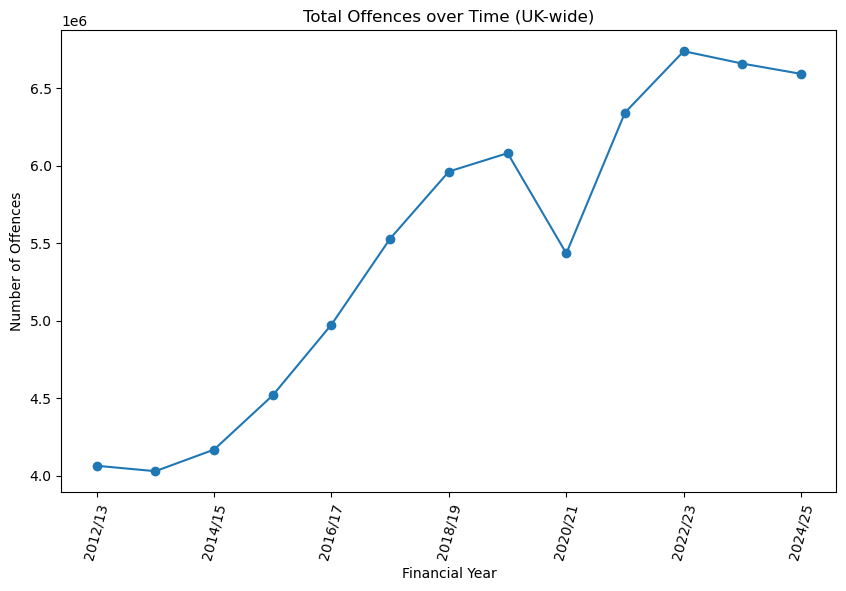

In [21]:
plt.figure(figsize=(10,6))
yearly_trends.plot(kind="line", marker="o")
plt.title("Total Offences over Time (UK-wide)")
plt.ylabel("Number of Offences")
plt.xticks(rotation=75)
plt.show()



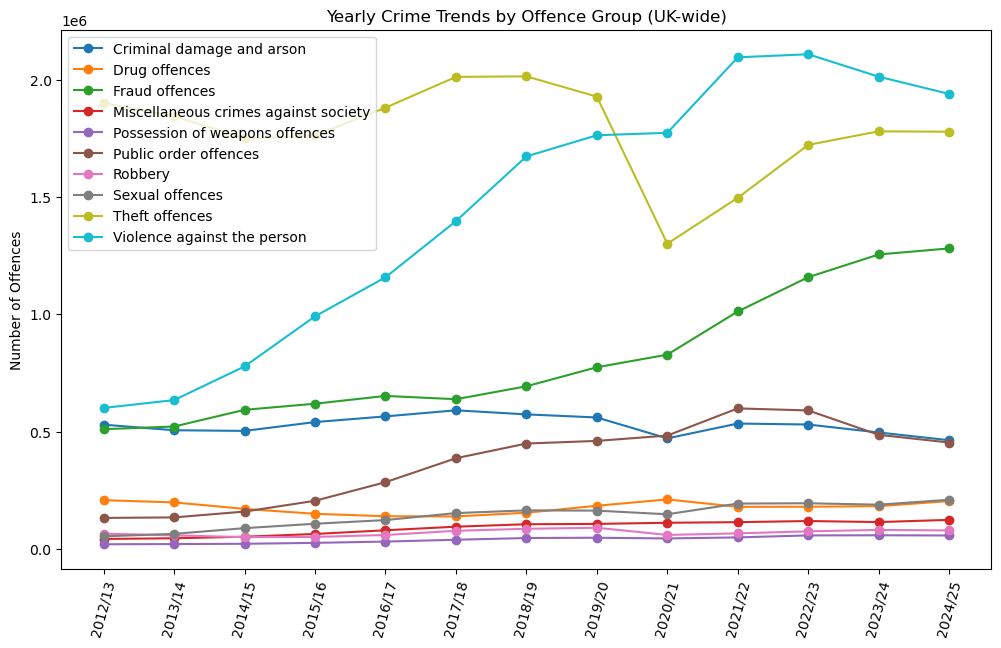

In [22]:
group_year_trends = df.groupby(["Financial Year", "Offence Group"])["Number of Offences"].sum().reset_index()

group_year_pivot = group_year_trends.pivot(index="Financial Year", columns="Offence Group", values="Number of Offences")

plt.figure(figsize=(12,7))
for col in group_year_pivot.columns:
    plt.plot(group_year_pivot.index, group_year_pivot[col], marker="o", label=col)

plt.title("Yearly Crime Trends by Offence Group (UK-wide)")
plt.ylabel("Number of Offences")
plt.xticks(rotation=75)
plt.legend()
plt.show()

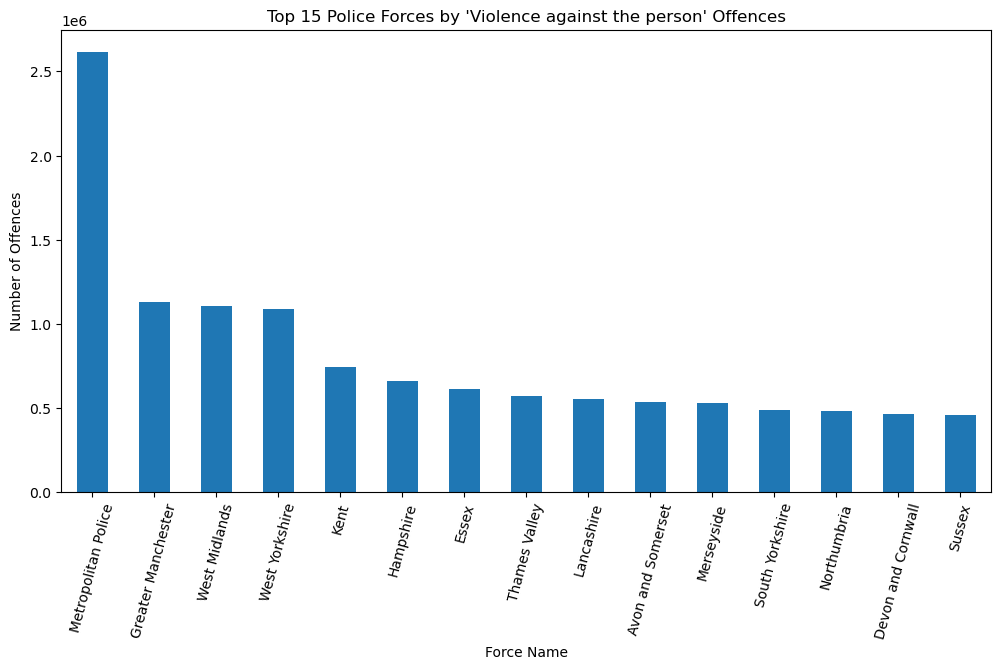

In [23]:
violence_distribution = df[df["Offence Group"]=="Violence against the person"]
force_violence = violence_distribution.groupby("Force Name")["Number of Offences"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
force_violence.head(15).plot(kind="bar")
plt.title("Top 15 Police Forces by 'Violence against the person' Offences")
plt.ylabel("Number of Offences")
plt.xticks(rotation=75)
plt.show()

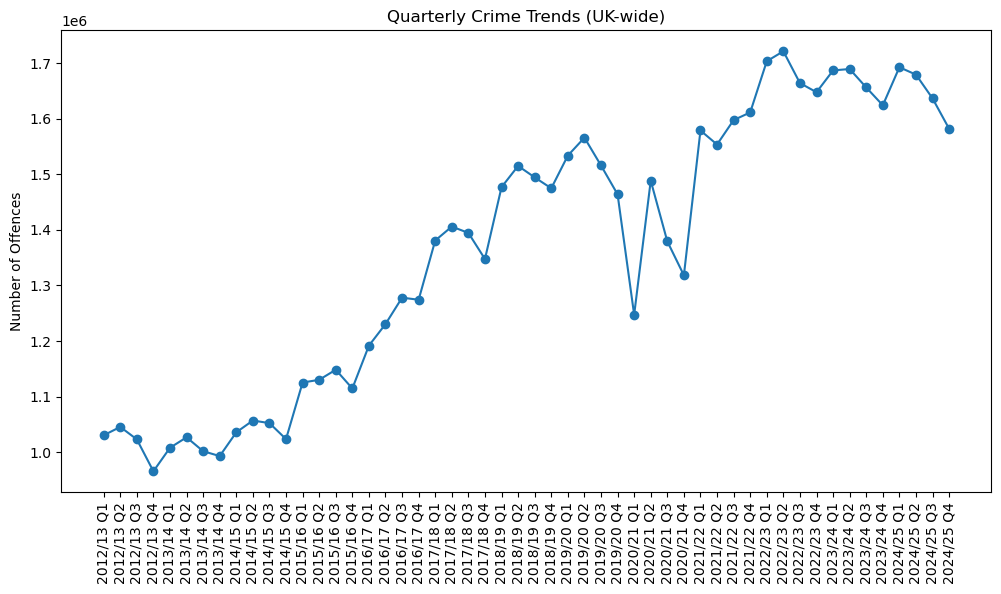

In [24]:
quarter_trends = df.groupby(["Financial Year", "Financial Quarter"])["Number of Offences"].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(quarter_trends["Financial Year"] + " Q" + quarter_trends["Financial Quarter"].astype(str),
         quarter_trends["Number of Offences"], marker="o")
plt.title("Quarterly Crime Trends (UK-wide)")
plt.ylabel("Number of Offences")
plt.xticks(rotation=90)
plt.show()


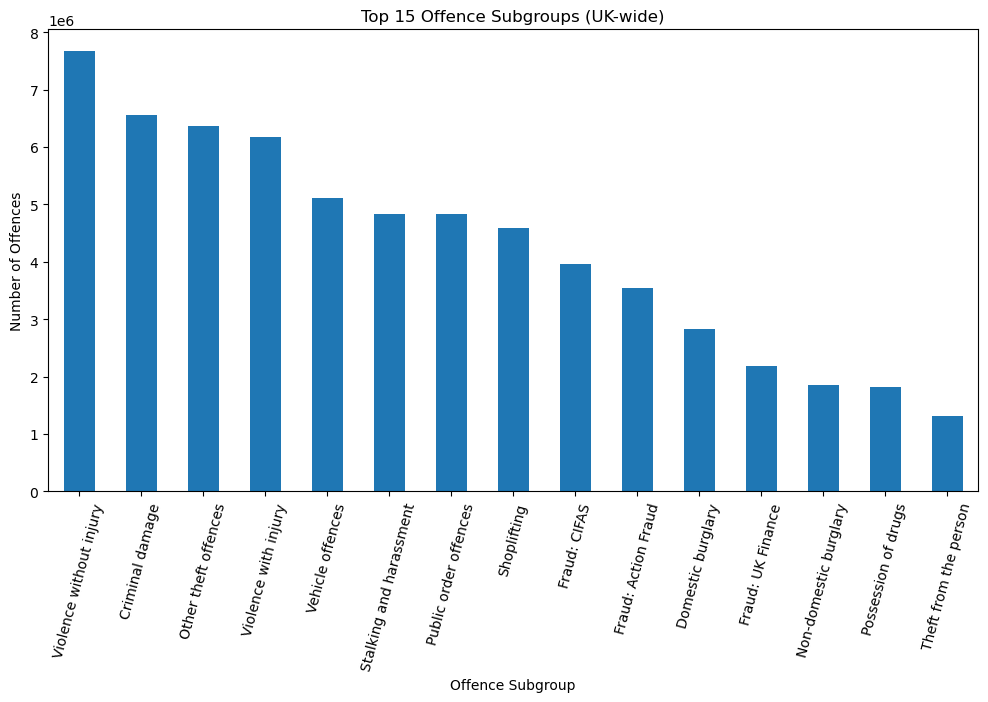

In [26]:
subgroup_counts = df.groupby("Offence Subgroup")["Number of Offences"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
subgroup_counts.head(15).plot(kind="bar")
plt.title("Top 15 Offence Subgroups (UK-wide)")
plt.ylabel("Number of Offences")
plt.xticks(rotation=75)
plt.show()

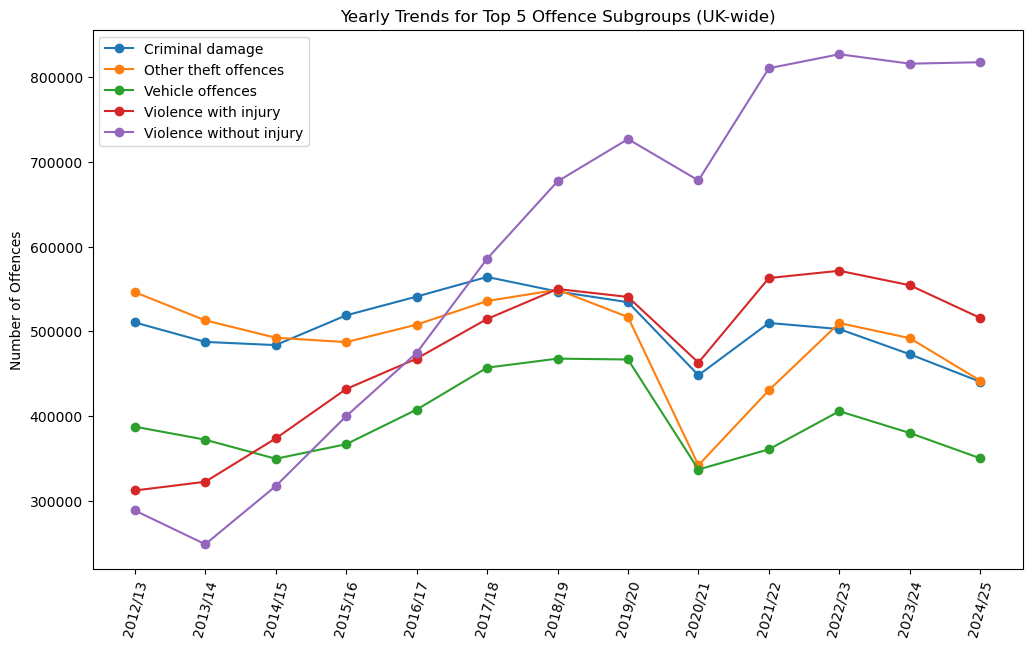

In [28]:
top5_subgroups = subgroup_counts.head(5).index
subgroup_year_trends = df[df["Offence Subgroup"].isin(top5_subgroups)]
subgroup_year_trends = subgroup_year_trends.groupby(["Financial Year", "Offence Subgroup"])["Number of Offences"].sum().reset_index()

subgroup_year_pivot = subgroup_year_trends.pivot(index="Financial Year", columns="Offence Subgroup", values="Number of Offences")

plt.figure(figsize=(12,7))
for col in subgroup_year_pivot.columns:
    plt.plot(subgroup_year_pivot.index, subgroup_year_pivot[col], marker="o", label=col)

plt.title("Yearly Trends for Top 5 Offence Subgroups (UK-wide)")
plt.ylabel("Number of Offences")
plt.xticks(rotation=75)
plt.legend()
plt.show()

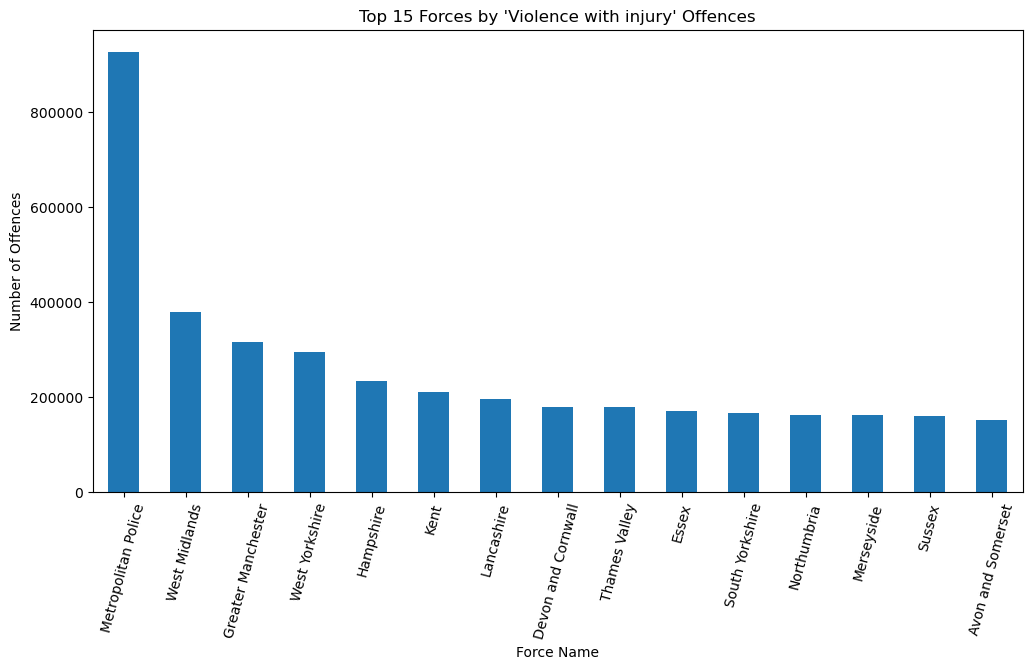

In [30]:
if "Violence with injury" in subgroup_counts.index:
    violence_injury_distribution = df[df["Offence Subgroup"]=="Violence with injury"]
    force_violence_injury = violence_injury_distribution.groupby("Force Name")["Number of Offences"].sum().sort_values(ascending=False)
    
    plt.figure(figsize=(12,6))
    force_violence_injury.head(15).plot(kind="bar")
    plt.title("Top 15 Forces by 'Violence with injury' Offences")
    plt.ylabel("Number of Offences")
    plt.xticks(rotation=75)
    plt.show()

In [31]:
df_feat = df.copy()

df_feat["Year"] = df_feat["Financial Year"].str[:4].astype(int)

df_feat["Quarter"] = df_feat["Financial Quarter"].astype(int)

df_feat["Year_Quarter"] = df_feat["Year"].astype(str) + "Q" + df_feat["Quarter"].astype(str)

df_feat = df_feat.sort_values(["Force Name", "Year", "Quarter"])

df_feat["Lag1"] = df_feat.groupby("Force Name")["Number of Offences"].shift(1)
df_feat["Lag2"] = df_feat.groupby("Force Name")["Number of Offences"].shift(2)

df_feat["RollingMean4"] = (
    df_feat.groupby("Force Name")["Number of Offences"].rolling(4).mean().reset_index(0, drop=True)
)

df_feat["Quarter_sin"] = np.sin(2 * np.pi * df_feat["Quarter"]/4)
df_feat["Quarter_cos"] = np.cos(2 * np.pi * df_feat["Quarter"]/4)
df_feat.head()

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences,Year,Quarter,Year_Quarter,Lag1,Lag2,RollingMean4,Quarter_sin,Quarter_cos
0,2012/13,1,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,20323,2012,1,2012Q1,NaN,NaN,NaN,1.000000e+00,6.123234e-17
6779,2012/13,2,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,25754,2012,2,2012Q2,20323.0,NaN,NaN,1.224647e-16,-1.000000e+00
13558,2012/13,3,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,27464,2012,3,2012Q3,25754.0,20323.0,NaN,-1.000000e+00,-1.836970e-16
20337,2012/13,4,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,43861,2012,4,2012Q4,27464.0,25754.0,29350.5,-2.449294e-16,1.000000e+00
27116,2013/14,1,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,54377,2013,1,2013Q1,43861.0,27464.0,37864.0,1.000000e+00,6.123234e-17


In [34]:
df_feat["crime_density"] = df_feat.groupby(["Force Name","Year_Quarter"])["Number of Offences"].transform("mean")
df_feat.head()

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences,Year,Quarter,Year_Quarter,Lag1,Lag2,RollingMean4,Quarter_sin,Quarter_cos,crime_density
0,2012/13,1,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,20323,2012,1,2012Q1,NaN,NaN,NaN,1.000000e+00,6.123234e-17,20323.0
6779,2012/13,2,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,25754,2012,2,2012Q2,20323.0,NaN,NaN,1.224647e-16,-1.000000e+00,25754.0
13558,2012/13,3,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,27464,2012,3,2012Q3,25754.0,20323.0,NaN,-1.000000e+00,-1.836970e-16,27464.0
20337,2012/13,4,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,43861,2012,4,2012Q4,27464.0,25754.0,29350.5,-2.449294e-16,1.000000e+00,43861.0
27116,2013/14,1,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,54377,2013,1,2013Q1,43861.0,27464.0,37864.0,1.000000e+00,6.123234e-17,54377.0


In [37]:
le_force = LabelEncoder()
le_group = LabelEncoder()
le_subgroup = LabelEncoder()

df_feat["Force_enc"] = le_force.fit_transform(df_feat["Force Name"])
df_feat["Group_enc"] = le_group.fit_transform(df_feat["Offence Group"])
df_feat["Subgroup_enc"] = le_subgroup.fit_transform(df_feat["Offence Subgroup"])
df_feat.head()

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences,Year,Quarter,Year_Quarter,Lag1,Lag2,RollingMean4,Quarter_sin,Quarter_cos,crime_density,Force_enc,Group_enc,Subgroup_enc
0,2012/13,1,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,20323,2012,1,2012Q1,NaN,NaN,NaN,1.000000e+00,6.123234e-17,20323.0,0,2,6
6779,2012/13,2,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,25754,2012,2,2012Q2,20323.0,NaN,NaN,1.224647e-16,-1.000000e+00,25754.0,0,2,6
13558,2012/13,3,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,27464,2012,3,2012Q3,25754.0,20323.0,NaN,-1.000000e+00,-1.836970e-16,27464.0,0,2,6
20337,2012/13,4,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,43861,2012,4,2012Q4,27464.0,25754.0,29350.5,-2.449294e-16,1.000000e+00,43861.0,0,2,6
27116,2013/14,1,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,54377,2013,1,2013Q1,43861.0,27464.0,37864.0,1.000000e+00,6.123234e-17,54377.0,0,2,6


In [39]:
feature_preview = df_feat[[
    "Year","Quarter","Year_Quarter",
    "Lag1","Lag2","RollingMean4",
    "Quarter_sin","Quarter_cos",
    "crime_density","Force_enc","Group_enc","Subgroup_enc",
    "Number of Offences"
]].head(15)

feature_preview

,Year,Quarter,Year_Quarter,Lag1,Lag2,RollingMean4,Quarter_sin,Quarter_cos,crime_density,Force_enc,Group_enc,Subgroup_enc,Number of Offences
0,2012,1,2012Q1,NaN,NaN,NaN,1.000000e+00,6.123234e-17,20323.0,0,2,6,20323
6779,2012,2,2012Q2,20323.0,NaN,NaN,1.224647e-16,-1.000000e+00,25754.0,0,2,6,25754
13558,2012,3,2012Q3,25754.0,20323.0,NaN,-1.000000e+00,-1.836970e-16,27464.0,0,2,6,27464
20337,2012,4,2012Q4,27464.0,25754.0,29350.50,-2.449294e-16,1.000000e+00,43861.0,0,2,6,43861
27116,2013,1,2013Q1,43861.0,27464.0,37864.00,1.000000e+00,6.123234e-17,54377.0,0,2,6,54377
32311,2013,2,2013Q2,54377.0,43861.0,44983.50,1.224647e-16,-1.000000e+00,54232.0,0,2,6,54232
37506,2013,3,2013Q3,54232.0,54377.0,50554.00,-1.000000e+00,-1.836970e-16,49746.0,0,2,6,49746
42701,2013,4,2013Q4,49746.0,54232.0,52805.25,-2.449294e-16,1.000000e+00,52866.0,0,2,6,52866
47896,2014,1,2014Q1,52866.0,49746.0,52340.25,1.000000e+00,6.123234e-17,52517.0,0,2,6,52517
53179,2014,2,2014Q2,52517.0,52866.0,53042.00,1.224647e-16,-1.000000e+00,57039.0,0,2,6,57039


In [41]:
median_threshold = df_feat["Number of Offences"].median()

df_feat["CrimeClass"] = np.where(df_feat["Number of Offences"] <= median_threshold, 0, 1)

class_distribution = df_feat["CrimeClass"].value_counts(normalize=True)

df_class_info = {
    "shape": df_feat.shape,
    "class_distribution": class_distribution,
    "preview": df_feat[["Number of Offences","CrimeClass"]].head(10)
}

df_class_info

{'shape': (302876, 21),
 'class_distribution': CrimeClass
 0    0.509509
 1    0.490491
 Name: proportion, dtype: float64,
 'preview':        Number of Offences  CrimeClass
 0                   20323           1
 6779                25754           1
 13558               27464           1
 20337               43861           1
 27116               54377           1
 32311               54232           1
 37506               49746           1
 42701               52866           1
 47896               52517           1
 53179               57039           1}

In [44]:
df_feat.head(100)

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences,Year,Quarter,...,Lag1,Lag2,RollingMean4,Quarter_sin,Quarter_cos,crime_density,Force_enc,Group_enc,Subgroup_enc,CrimeClass
0,2012/13,1,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,20323,2012,1,...,NaN,NaN,NaN,1.000000e+00,6.123234e-17,20323.000000,0,2,6,1
6779,2012/13,2,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,25754,2012,2,...,20323.0,NaN,NaN,1.224647e-16,-1.000000e+00,25754.000000,0,2,6,1
13558,2012/13,3,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,27464,2012,3,...,25754.0,20323.0,NaN,-1.000000e+00,-1.836970e-16,27464.000000,0,2,6,1
20337,2012/13,4,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,43861,2012,4,...,27464.0,25754.0,29350.5,-2.449294e-16,1.000000e+00,43861.000000,0,2,6,1
27116,2013/14,1,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,54377,2013,1,...,43861.0,27464.0,37864.0,1.000000e+00,6.123234e-17,54377.000000,0,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,2012/13,1,Avon and Somerset,Dangerous driving,Miscellaneous crimes against society,Miscellaneous crimes against society,802,16,2012,1,...,0.0,30.0,11.5,1.000000e+00,6.123234e-17,172.753247,1,3,12,1
45,2012/13,1,Avon and Somerset,"Disclosure, obstruction, false or misleading s...",Miscellaneous crimes against society,Miscellaneous crimes against society,95,0,2012,1,...,16.0,0.0,11.5,1.000000e+00,6.123234e-17,172.753247,1,3,12,0
46,2012/13,1,Avon and Somerset,Dishonest use of electricity,Theft offences,Other theft offences,43,20,2012,1,...,0.0,16.0,9.0,1.000000e+00,6.123234e-17,172.753247,1,8,15,1
47,2012/13,1,Avon and Somerset,Distraction burglary in a dwelling,Theft offences,Domestic burglary,28C,22,2012,1,...,20.0,0.0,14.5,1.000000e+00,6.123234e-17,172.753247,1,8,4,1


In [48]:
df_feat.isnull().sum()

Financial Year           0
Financial Quarter        0
Force Name               0
Offence Description      0
Offence Group            0
Offence Subgroup         0
Offence Code             0
Number of Offences       0
Year                     0
Quarter                  0
Year_Quarter             0
Lag1                    49
Lag2                    98
RollingMean4           147
Quarter_sin              0
Quarter_cos              0
crime_density            0
Force_enc                0
Group_enc                0
Subgroup_enc             0
CrimeClass               0
dtype: int64

In [50]:
df_feat[["Lag1", "Lag2", "RollingMean4"]] = df_feat[["Lag1", "Lag2", "RollingMean4"]].fillna(0)

df_feat.isnull().sum()

Financial Year         0
Financial Quarter      0
Force Name             0
Offence Description    0
Offence Group          0
Offence Subgroup       0
Offence Code           0
Number of Offences     0
Year                   0
Quarter                0
Year_Quarter           0
Lag1                   0
Lag2                   0
RollingMean4           0
Quarter_sin            0
Quarter_cos            0
crime_density          0
Force_enc              0
Group_enc              0
Subgroup_enc           0
CrimeClass             0
dtype: int64

In [53]:
features = ["Lag1","Lag2","RollingMean4",
            "Quarter_sin","Quarter_cos",
            "crime_density","Force_enc",
            "Group_enc","Subgroup_enc",
            "Year","Quarter"]

X = df_feat[features]
y = df_feat["CrimeClass"]


print(X,y)

           Lag1     Lag2  RollingMean4   Quarter_sin   Quarter_cos  \
0           0.0      0.0          0.00  1.000000e+00  6.123234e-17   
6779    20323.0      0.0          0.00  1.224647e-16 -1.000000e+00   
13558   25754.0  20323.0          0.00 -1.000000e+00 -1.836970e-16   
20337   27464.0  25754.0      29350.50 -2.449294e-16  1.000000e+00   
27116   43861.0  27464.0      37864.00  1.000000e+00  6.123234e-17   
...         ...      ...           ...           ...           ...   
302871     69.0     66.0         66.75 -2.449294e-16  1.000000e+00   
302872      0.0     69.0         59.25 -2.449294e-16  1.000000e+00   
302873    102.0      0.0         42.75 -2.449294e-16  1.000000e+00   
302874      0.0    102.0         26.00 -2.449294e-16  1.000000e+00   
302875      2.0      0.0         26.00 -2.449294e-16  1.000000e+00   

        crime_density  Force_enc  Group_enc  Subgroup_enc  Year  Quarter  
0          20323.0000          0          2             6  2012        1  
6779     

In [55]:
log_reg = LogisticRegression(max_iter=1000, solver="liblinear")

selector = RFE(log_reg, n_features_to_select=10, step=1)
selector = selector.fit(X, y)

rfe_results = pd.DataFrame({
    "Feature": features,
    "Rank": selector.ranking_,
    "Selected": selector.support_
}).sort_values("Rank")

print("✅ Top 10 Features Selected by Logistic Regression (RFE):")
print(rfe_results[rfe_results["Selected"] == True])

✅ Top 10 Features Selected by Logistic Regression (RFE):
          Feature  Rank  Selected
0            Lag1     1      True
1            Lag2     1      True
2    RollingMean4     1      True
3     Quarter_sin     1      True
4     Quarter_cos     1      True
5   crime_density     1      True
6       Force_enc     1      True
7       Group_enc     1      True
8    Subgroup_enc     1      True
10        Quarter     1      True


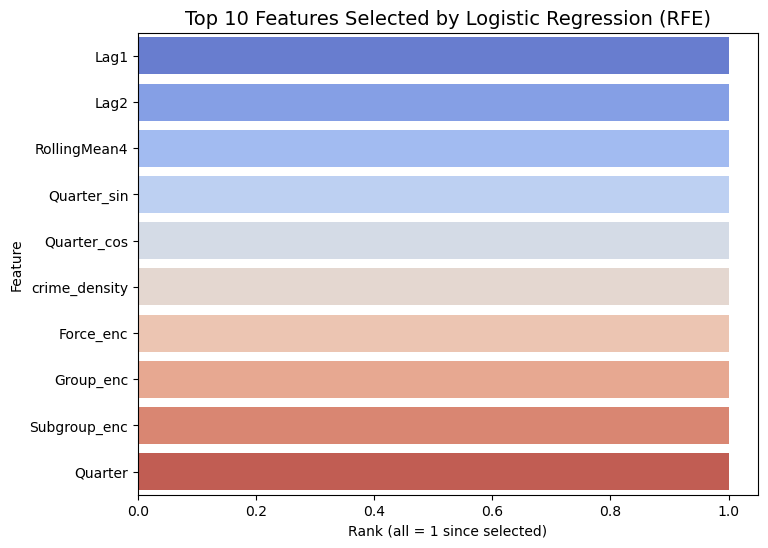

In [56]:
top10 = rfe_results[rfe_results["Selected"] == True]

plt.figure(figsize=(8,6))
sns.barplot(data=top10, x="Rank", y="Feature", palette="coolwarm", dodge=False)
plt.title("Top 10 Features Selected by Logistic Regression (RFE)", fontsize=14)
plt.xlabel("Rank (all = 1 since selected)")
plt.ylabel("Feature")
plt.show()


In [59]:
df_feat.head()

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences,Year,Quarter,...,Lag1,Lag2,RollingMean4,Quarter_sin,Quarter_cos,crime_density,Force_enc,Group_enc,Subgroup_enc,CrimeClass
0,2012/13,1,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,20323,2012,1,...,0.0,0.0,0.0,1.000000e+00,6.123234e-17,20323.0,0,2,6,1
6779,2012/13,2,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,25754,2012,2,...,20323.0,0.0,0.0,1.224647e-16,-1.000000e+00,25754.0,0,2,6,1
13558,2012/13,3,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,27464,2012,3,...,25754.0,20323.0,0.0,-1.000000e+00,-1.836970e-16,27464.0,0,2,6,1
20337,2012/13,4,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,43861,2012,4,...,27464.0,25754.0,29350.5,-2.449294e-16,1.000000e+00,43861.0,0,2,6,1
27116,2013/14,1,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,54377,2013,1,...,43861.0,27464.0,37864.0,1.000000e+00,6.123234e-17,54377.0,0,2,6,1


### TRAIN TEST

In [63]:
df_feat.to_csv("Crime.csv")

In [28]:
selected_features = top10["Feature"].tolist()

X_selected = df_feat[selected_features].fillna(0)
y = df_feat["CrimeClass"]

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

print("✅ Train/Test split completed")
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


✅ Train/Test split completed
Training set: (242300, 10)
Test set: (60576, 10)


In [29]:
clf = LogisticRegression(max_iter=1000, solver="liblinear")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("✅ Logistic Regression Classifier Results:")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Logistic Regression Classifier Results:
Accuracy  : 0.6964
Precision : 0.7591
Recall    : 0.5581
F1 Score  : 0.6433

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.83      0.74     30864
           1       0.76      0.56      0.64     29712

    accuracy                           0.70     60576
   macro avg       0.71      0.69      0.69     60576
weighted avg       0.71      0.70      0.69     60576



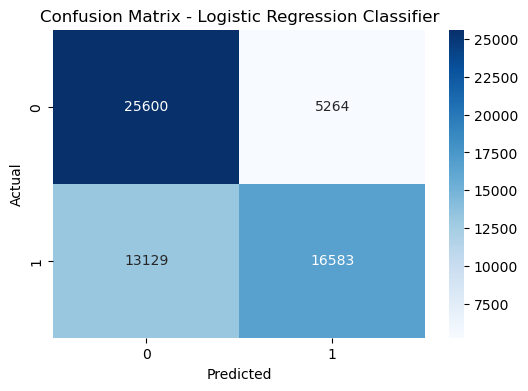

In [30]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression Classifier")
plt.show()

In [31]:
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=12,
    min_samples_split=20,
    min_samples_leaf=20,
    max_features="sqrt",
    bootstrap=True,
    oob_score=True,
    random_state=42,
    n_jobs=1)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
auc  = roc_auc_score(y_test, y_proba)

print("Random Forest Classifier")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"ROC AUC  : {auc:.4f}")
print("\nClassification report:\n", classification_report(y_test, y_pred))

Random Forest Classifier
Accuracy : 0.8972
Precision: 0.8985
Recall   : 0.8910
F1 Score : 0.8947
ROC AUC  : 0.9693

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     30864
           1       0.90      0.89      0.89     29712

    accuracy                           0.90     60576
   macro avg       0.90      0.90      0.90     60576
weighted avg       0.90      0.90      0.90     60576



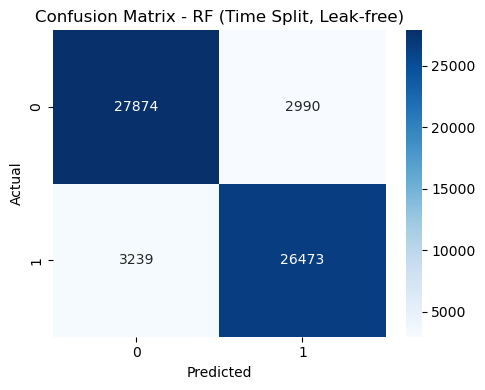

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.title("Confusion Matrix - RF (Time Split, Leak-free)")
plt.tight_layout(); plt.show()

In [33]:
xgb = XGBClassifier(
    n_estimators=2000,          # large, will stop early
    learning_rate=0.03,         # smaller step (stronger regularization)
    max_depth=5,                # shallower trees
    min_child_weight=5,         # fewer overly-specific splits
    subsample=0.7,              # row subsampling
    colsample_bytree=0.7,       # feature subsampling
    gamma=1.0,                  # require gain to split
    reg_alpha=0.5,              # L1
    reg_lambda=2.0,             # L2
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42,
    n_jobs=1,                   # set to -1 if your env supports it
    tree_method="hist"
)
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

# Metrics
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
auc  = roc_auc_score(y_test, y_proba)

print("XGBoost Classifier")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"ROC AUC  : {auc:.4f}")
print("\nClassification report:\n", classification_report(y_test, y_pred))

XGBoost Classifier
Accuracy : 0.9205
Precision: 0.9150
Recall   : 0.9238
F1 Score : 0.9194
ROC AUC  : 0.9784

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     30864
           1       0.91      0.92      0.92     29712

    accuracy                           0.92     60576
   macro avg       0.92      0.92      0.92     60576
weighted avg       0.92      0.92      0.92     60576



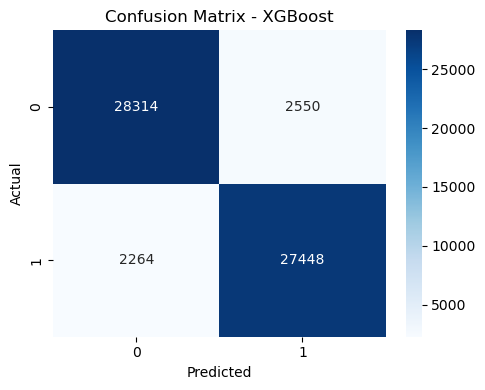

In [34]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.title("Confusion Matrix - XGBoost")
plt.tight_layout(); plt.show()

In [35]:
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=10),
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

bagging_clf.fit(X_train, y_train)
y_pred_bag = bagging_clf.predict(X_test)

print("Bagging Classifier Results:")
print("Accuracy :", accuracy_score(y_test, y_pred_bag))
print("ROC AUC  :", roc_auc_score(y_test, bagging_clf.predict_proba(X_test)[:,1]))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bag))


Bagging Classifier Results:
Accuracy : 0.8752311146328579
ROC AUC  : 0.9560916330817667

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     30864
           1       0.87      0.88      0.87     29712

    accuracy                           0.88     60576
   macro avg       0.88      0.88      0.88     60576
weighted avg       0.88      0.88      0.88     60576



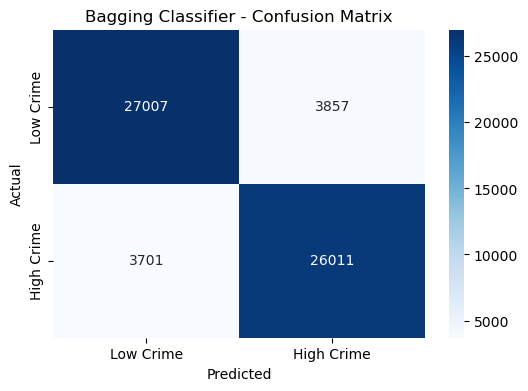

In [36]:
y_pred_bag = bagging_clf.predict(X_test)
y_proba_bag = bagging_clf.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred_bag)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Crime", "High Crime"], yticklabels=["Low Crime", "High Crime"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Bagging Classifier - Confusion Matrix")
plt.show()

In [39]:
results = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, clf.predict(X_test)),
        "Precision": precision_score(y_test, clf.predict(X_test)),
        "Recall": recall_score(y_test, clf.predict(X_test)),
        "F1": f1_score(y_test, clf.predict(X_test)),
        "ROC AUC": roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, rf.predict(X_test)),
        "Precision": precision_score(y_test, rf.predict(X_test)),
        "Recall": recall_score(y_test, rf.predict(X_test)),
        "F1": f1_score(y_test, rf.predict(X_test)),
        "ROC AUC": roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
    },
    "XGBoost": {
        "Accuracy": accuracy_score(y_test, xgb.predict(X_test)),
        "Precision": precision_score(y_test, xgb.predict(X_test)),
        "Recall": recall_score(y_test, xgb.predict(X_test)),
        "F1": f1_score(y_test, xgb.predict(X_test)),
        "ROC AUC": roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])
    },
    "Bagging": {
        "Accuracy": accuracy_score(y_test, bagging_clf.predict(X_test)),
        "Precision": precision_score(y_test, bagging_clf.predict(X_test)),
        "Recall": recall_score(y_test, bagging_clf.predict(X_test)),
        "F1": f1_score(y_test, bagging_clf.predict(X_test)),
        "ROC AUC": roc_auc_score(y_test, bagging_clf.predict_proba(X_test)[:,1])
    }
}


comparison_df = pd.DataFrame(results).T
print("\n=== Model Comparison ===")
print(comparison_df.round(4))


=== Model Comparison ===
                     Accuracy  Precision  Recall      F1  ROC AUC
Logistic Regression    0.6964     0.7591  0.5581  0.6433   0.7542
Random Forest          0.8972     0.8985  0.8910  0.8947   0.9693
XGBoost                0.9205     0.9150  0.9238  0.9194   0.9784
Bagging                0.8752     0.8709  0.8754  0.8731   0.9561


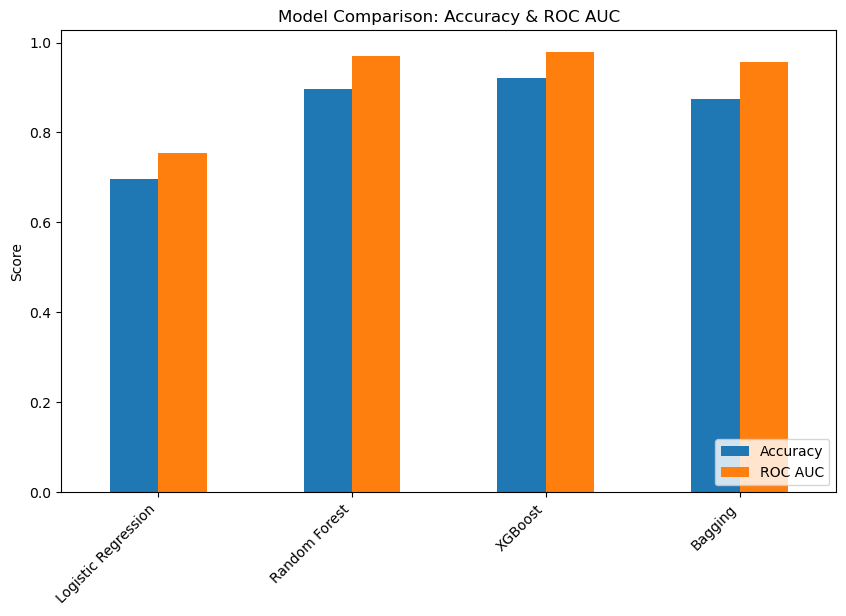

In [40]:
comparison_df[["Accuracy","ROC AUC"]].plot(kind="bar", figsize=(10,6))
plt.title("Model Comparison: Accuracy & ROC AUC")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.legend(loc="lower right")
plt.show()

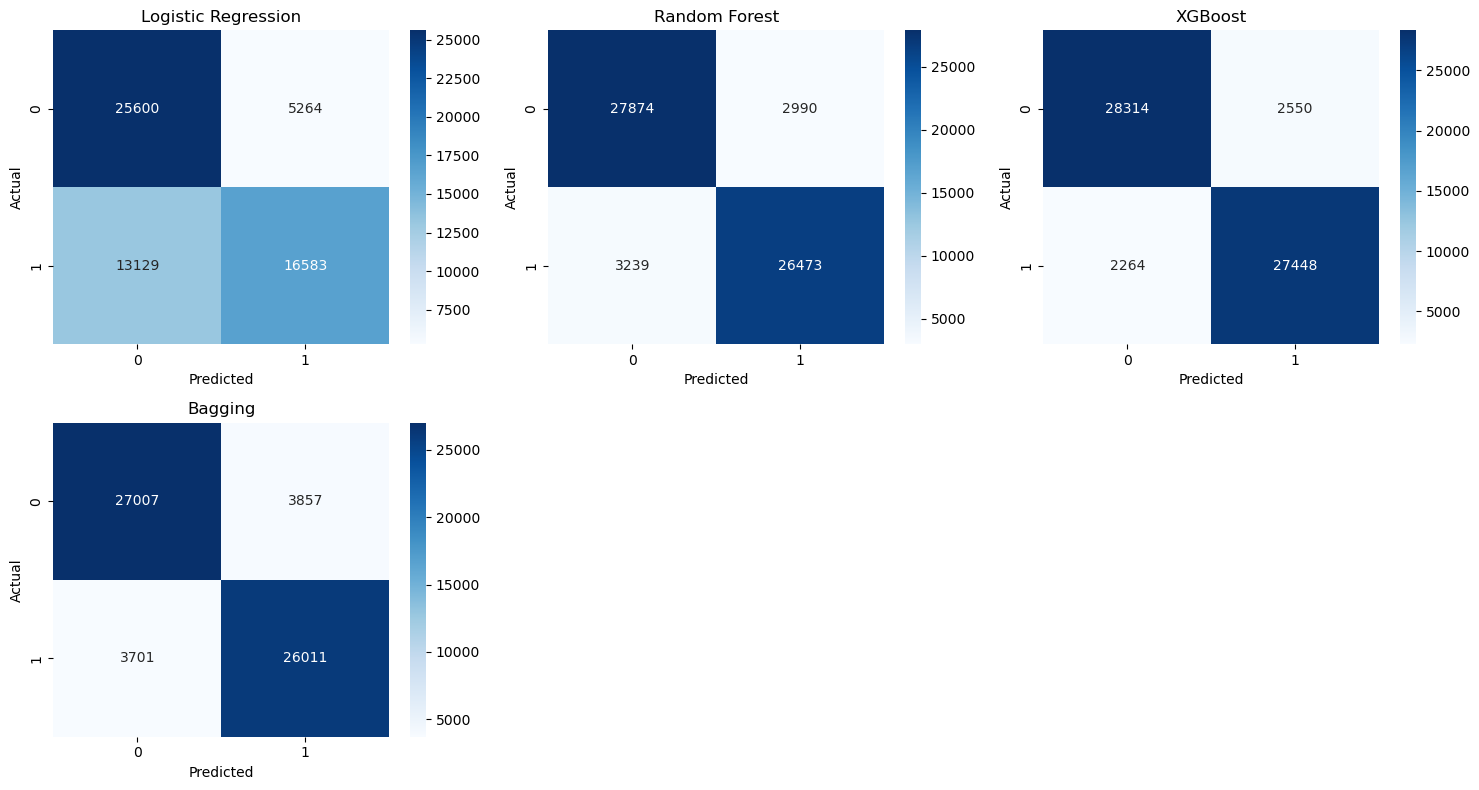

In [41]:
models = {
    "Logistic Regression": clf,
    "Random Forest": rf,
    "XGBoost": xgb,
    "Bagging": bagging_clf,
   
}

plt.figure(figsize=(15,8))
for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

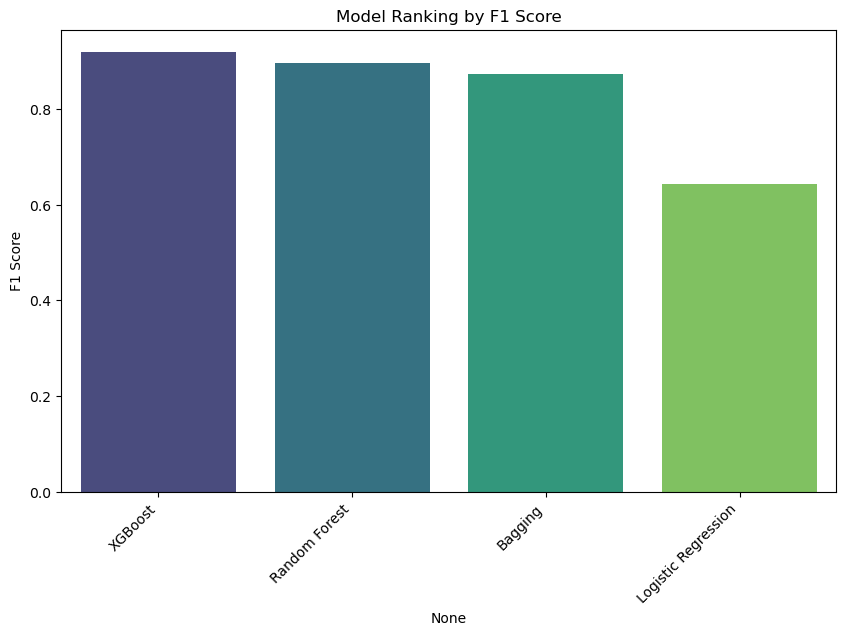

In [42]:

ranked = comparison_df.sort_values("F1", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=ranked.index, y=ranked["F1"], palette="viridis")
plt.title("Model Ranking by F1 Score")
plt.ylabel("F1 Score")
plt.xticks(rotation=45, ha="right")
plt.show()



In [43]:
best_model = ranked.index[0]
print(f"\n🔎 Recommendation: Based on F1 score, the **{best_model}** performs best overall.")

ranked_recall = comparison_df.sort_values("Recall", ascending=False)
print("\n=== Ranked by Recall (catching more true positives) ===")
print(ranked_recall[["Accuracy","Precision","Recall","F1","ROC AUC"]].round(4))

best_recall_model = ranked_recall.index[0]




🔎 Recommendation: Based on F1 score, the **XGBoost** performs best overall.

=== Ranked by Recall (catching more true positives) ===
                     Accuracy  Precision  Recall      F1  ROC AUC
XGBoost                0.9205     0.9150  0.9238  0.9194   0.9784
Random Forest          0.8972     0.8985  0.8910  0.8947   0.9693
Bagging                0.8752     0.8709  0.8754  0.8731   0.9561
Logistic Regression    0.6964     0.7591  0.5581  0.6433   0.7542


### Deep Learning

In [45]:
RANDOM_STATE = 42
BATCH = 64
VALID_SIZE = 0.15   
SEQ_AS_FEATURES = True  
try:
    _ = X_train
    _ = X_test
    _ = y_train
    _ = y_test
except NameError:
    raise RuntimeError("Make sure X_train, X_test, y_train and y_test are in memory before running this cell.")

def to_np(a):
    if hasattr(a, "values"):
        return a.values
    return np.array(a)

X_train_np = to_np(X_train)
X_test_np  = to_np(X_test)
y_train_np = to_np(y_train)
y_test_np  = to_np(y_test)

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_np, y_train_np, test_size=VALID_SIZE, stratify=y_train_np, random_state=RANDOM_STATE
)

if SEQ_AS_FEATURES:
    def to_seq(X):
        # X: (N, n_features) -> (N, seq_len=n_features, feat_dim=1)
        X = np.asarray(X, dtype=np.float32)
        return X.reshape(X.shape[0], X.shape[1], 1)
    Xtr_seq = to_seq(X_tr)
    Xval_seq = to_seq(X_val)
    Xt_seq = to_seq(X_test_np)
else:
    raise NotImplementedError("Only SEQ_AS_FEATURES=True is implemented in this cell.")

print("Sequence shapes (train/val/test):", Xtr_seq.shape, Xval_seq.shape, Xt_seq.shape)

n_feat = Xtr_seq.shape[-1]
seq_len = Xtr_seq.shape[1]
scaler = StandardScaler()
Xtr_flat = Xtr_seq.reshape(-1, n_feat)
Xval_flat = Xval_seq.reshape(-1, n_feat)
Xt_flat = Xt_seq.reshape(-1, n_feat)

scaler.fit(Xtr_flat)
Xtr_scaled = scaler.transform(Xtr_flat).reshape(Xtr_seq.shape)
Xval_scaled = scaler.transform(Xval_flat).reshape(Xval_seq.shape)
Xt_scaled = scaler.transform(Xt_flat).reshape(Xt_seq.shape)

class SeqDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self):
        return len(self.y)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(SeqDataset(Xtr_scaled, y_tr), batch_size=BATCH, shuffle=True)
valid_loader = DataLoader(SeqDataset(Xval_scaled, y_val), batch_size=BATCH, shuffle=False)
test_loader  = DataLoader(SeqDataset(Xt_scaled, y_test_np), batch_size=BATCH, shuffle=False)

print("Batches (train/val/test):", len(train_loader), len(valid_loader), len(test_loader))
print("seq_len:", seq_len, "feat_dim_per_timestep:", n_feat)

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("DEVICE:", DEVICE)

results = {}
model_preds = {}


Sequence shapes (train/val/test): (205955, 10, 1) (36345, 10, 1) (60576, 10, 1)
Batches (train/val/test): 3219 568 947
seq_len: 10 feat_dim_per_timestep: 1
DEVICE: cpu


In [46]:
EPOCHS = 20
LR = 1e-3
PATIENCE = 6
HIDDEN = 64
LAYERS = 1
DROPOUT = 0.2
torch.manual_seed(42)

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden=HIDDEN, layers=LAYERS, dropout=DROPOUT):
        super().__init__()
        self.lstm = nn.LSTM(input_size=input_dim, hidden_size=hidden,
                            num_layers=layers, batch_first=True,
                            dropout=0.0 if layers==1 else dropout)
        self.head = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(hidden, 64),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        out, _ = self.lstm(x)          # (B, T, H)
        last = out[:, -1, :]           # (B, H)
        return self.head(last).squeeze(1)  # (B,)

# Utilities
def compute_pos_weight(loader):
    ys = []
    for _, y in loader.dataset:
        ys.append(float(y))
    ys = np.array(ys)
    pos = (len(ys) - ys.sum()) / (ys.sum() + 1e-9)
    return max(pos, 1e-6)

def train_model(model, train_loader, valid_loader, epochs=EPOCHS, lr=LR, patience=PATIENCE):
    model = model.to(DEVICE)
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    pos_weight = compute_pos_weight(train_loader)
    loss_fn = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([pos_weight], device=DEVICE))
    best_auc = -np.inf; best_state = None; patience_left = patience
    hist = {"train_loss": [], "valid_loss": [], "valid_auc": []}

    for ep in range(1, epochs+1):
        model.train()
        train_loss = 0.0; seen = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            opt.zero_grad()
            logits = model(xb)
            loss = loss_fn(logits, yb)
            loss.backward()
            opt.step()
            train_loss += loss.item() * xb.size(0)
            seen += xb.size(0)
        train_loss /= max(1, seen)

        # validation
        model.eval()
        val_loss = 0.0; vseen = 0; all_probs=[]; all_true=[]
        with torch.no_grad():
            for xb, yb in valid_loader:
                xb, yb = xb.to(DEVICE), yb.to(DEVICE)
                logits = model(xb)
                loss = loss_fn(logits, yb)
                val_loss += loss.item() * xb.size(0)
                vseen += xb.size(0)
                all_probs.append(torch.sigmoid(logits).cpu().numpy())
                all_true.append(yb.cpu().numpy())
        val_loss /= max(1, vseen)
        if len(all_probs):
            all_probs = np.concatenate(all_probs); all_true = np.concatenate(all_true)
            try:
                val_auc = roc_auc_score(all_true, all_probs)
            except Exception:
                val_auc = np.nan
        else:
            val_auc = np.nan

        hist["train_loss"].append(train_loss); hist["valid_loss"].append(val_loss); hist["valid_auc"].append(val_auc)

        print(f"Epoch {ep:02d}: train_loss={train_loss:.4f}, valid_loss={val_loss:.4f}, valid_auc={val_auc if not np.isnan(val_auc) else 'nan'}")
        if not np.isnan(val_auc) and val_auc > best_auc:
            best_auc = val_auc; best_state = deepcopy(model.state_dict()); patience_left = patience
        else:
            patience_left -= 1
            if patience_left <= 0:
                print(f"Early stopping epoch {ep}. Best valid AUC {best_auc:.4f}")
                break
    if best_state is not None:
        model.load_state_dict(best_state)
    return model, hist

def evaluate(model, loader):
    model.eval()
    all_probs=[]; all_preds=[]; all_true=[]
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(DEVICE)
            logits = model(xb)
            probs = torch.sigmoid(logits).cpu().numpy()
            preds = (probs >= 0.5).astype(int)
            all_probs.append(probs); all_preds.append(preds); all_true.append(yb.numpy())
    if len(all_probs)==0:
        return {}
    y_proba = np.concatenate(all_probs).ravel()
    y_pred = np.concatenate(all_preds).ravel()
    y_true = np.concatenate(all_true).ravel()
    res = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1": f1_score(y_true, y_pred, zero_division=0),
        "ROC AUC": roc_auc_score(y_true, y_proba)
    }
    return res, y_true, y_pred, y_proba

input_dim = n_feat  # per-timestep feature dim (1)
lstm = LSTMModel(input_dim, hidden=HIDDEN, layers=LAYERS, dropout=DROPOUT)
lstm, hist_lstm = train_model(lstm, train_loader, valid_loader, epochs=EPOCHS, lr=LR, patience=PATIENCE)

res_lstm, y_true_lstm, y_pred_lstm, y_proba_lstm = evaluate(lstm, test_loader)
print("LSTM Test metrics:", res_lstm)

Epoch 01: train_loss=0.6395, valid_loss=0.6297, valid_auc=0.733793012407298
Epoch 02: train_loss=0.6026, valid_loss=0.5726, valid_auc=0.777813965418058
Epoch 03: train_loss=0.5640, valid_loss=0.5514, valid_auc=0.8045425934404427
Epoch 04: train_loss=0.5435, valid_loss=0.5382, valid_auc=0.8257914871697745
Epoch 05: train_loss=0.5266, valid_loss=0.6063, valid_auc=0.8186161017635547
Epoch 06: train_loss=0.5056, valid_loss=0.4828, valid_auc=0.8482532126931417
Epoch 07: train_loss=0.4829, valid_loss=0.5387, valid_auc=0.8449390853432481
Epoch 08: train_loss=0.4708, valid_loss=0.4644, valid_auc=0.8665007164992228
Epoch 09: train_loss=0.4576, valid_loss=0.4368, valid_auc=0.8720302962447161
Epoch 10: train_loss=0.4492, valid_loss=0.4333, valid_auc=0.8727046578092876
Epoch 11: train_loss=0.4401, valid_loss=0.4249, valid_auc=0.8808488519094364
Epoch 12: train_loss=0.4295, valid_loss=0.4718, valid_auc=0.875990189530434
Epoch 13: train_loss=0.4222, valid_loss=0.4257, valid_auc=0.886620847765518
Epo

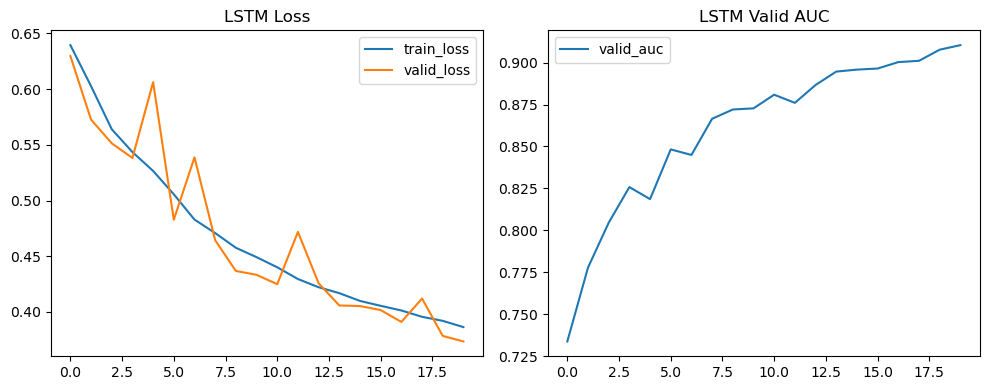

In [47]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(hist_lstm["train_loss"], label="train_loss"); plt.plot(hist_lstm["valid_loss"], label="valid_loss"); plt.title("LSTM Loss"); plt.legend()
plt.subplot(1,2,2); plt.plot(hist_lstm["valid_auc"], label="valid_auc"); plt.title("LSTM Valid AUC"); plt.legend()
plt.tight_layout(); plt.show()

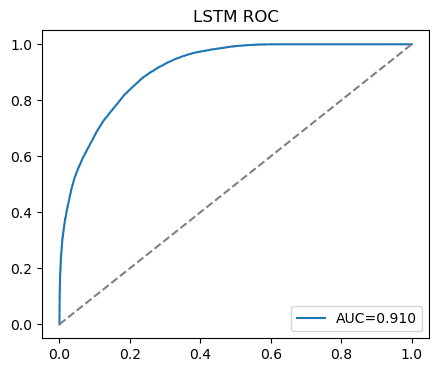

In [48]:
fpr, tpr, _ = roc_curve(y_true_lstm, y_proba_lstm)
plt.figure(figsize=(5,4)); plt.plot(fpr, tpr, label=f"AUC={res_lstm['ROC AUC']:.3f}"); plt.plot([0,1],[0,1],'--', color='grey'); plt.title("LSTM ROC"); plt.legend(); plt.show()

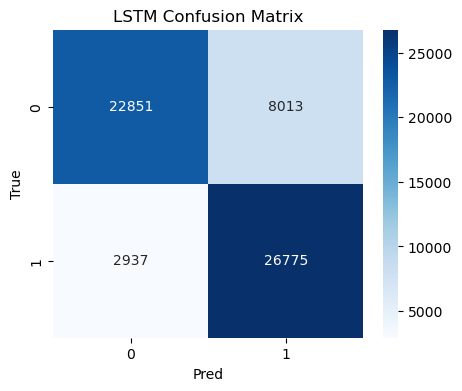

In [49]:
cm = confusion_matrix(y_true_lstm, y_pred_lstm)
plt.figure(figsize=(5,4)); sns.heatmap(cm, annot=True, fmt="d", cmap="Blues"); plt.title("LSTM Confusion Matrix"); plt.xlabel("Pred"); plt.ylabel("True"); plt.show()

In [51]:
EPOCHS = 20
LR = 1e-3
PATIENCE = 6
torch.manual_seed(42)

class CNN1DModel(nn.Module):
    def __init__(self, n_channels=1, hidden=64, dropout=0.2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv1d(in_channels=n_channels, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )
        self.head = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(dropout),
            nn.Linear(64, 1)
        )
    def forward(self, x):  # x: (B, T, F)
        x = x.transpose(1, 2)  # (B, F, T)
        feat = self.net(x)     # (B, 64, 1)
        return self.head(feat).squeeze(1)

cnn = CNN1DModel(n_channels=n_feat, hidden=64, dropout=0.2)  # n_feat is per-timestep feature dim (1)
cnn, hist_cnn = train_model(cnn, train_loader, valid_loader, epochs=EPOCHS, lr=LR, patience=PATIENCE)

res_cnn, y_true_cnn, y_pred_cnn, y_proba_cnn = evaluate(cnn, test_loader)
print("CNN Test metrics:", res_cnn)


Epoch 01: train_loss=0.6229, valid_loss=0.5793, valid_auc=0.7848694824317817
Epoch 02: train_loss=0.5633, valid_loss=0.5378, valid_auc=0.8190850110056518
Epoch 03: train_loss=0.5369, valid_loss=0.5168, valid_auc=0.8344193381622909
Epoch 04: train_loss=0.5193, valid_loss=0.5015, valid_auc=0.8449165223622391
Epoch 05: train_loss=0.5042, valid_loss=0.4869, valid_auc=0.8531996430538524
Epoch 06: train_loss=0.4893, valid_loss=0.4709, valid_auc=0.8621571677188091
Epoch 07: train_loss=0.4755, valid_loss=0.4589, valid_auc=0.8671829115697205
Epoch 08: train_loss=0.4631, valid_loss=0.4563, valid_auc=0.8748215794828254
Epoch 09: train_loss=0.4516, valid_loss=0.4593, valid_auc=0.870771472138046
Epoch 10: train_loss=0.4429, valid_loss=0.4370, valid_auc=0.8799468249137452
Epoch 11: train_loss=0.4354, valid_loss=0.4233, valid_auc=0.8866598653498485
Epoch 12: train_loss=0.4295, valid_loss=0.4158, valid_auc=0.8912619607199901
Epoch 13: train_loss=0.4229, valid_loss=0.4089, valid_auc=0.894138166008324
E

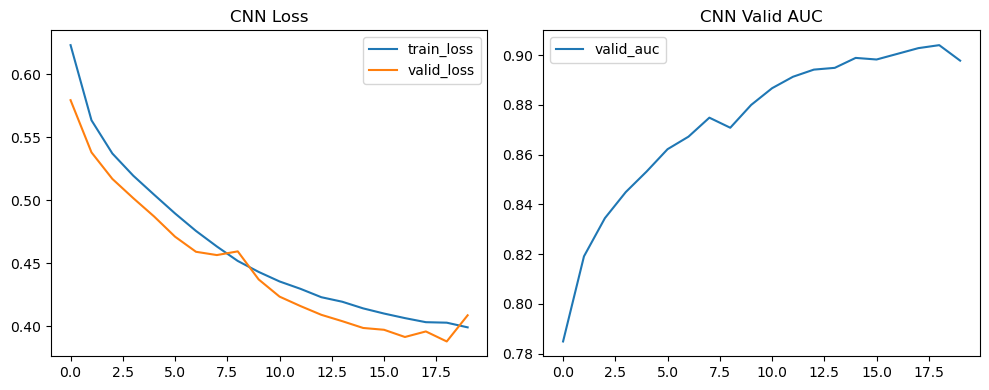

In [53]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(hist_cnn["train_loss"], label="train_loss"); plt.plot(hist_cnn["valid_loss"], label="valid_loss"); plt.title("CNN Loss"); plt.legend()
plt.subplot(1,2,2); plt.plot(hist_cnn["valid_auc"], label="valid_auc"); plt.title("CNN Valid AUC"); plt.legend()
plt.tight_layout(); plt.show()

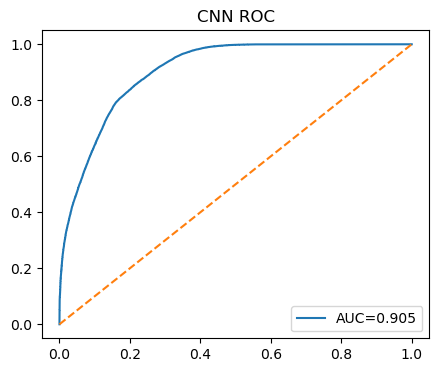

In [55]:
fpr, tpr, _ = roc_curve(y_true_cnn, y_proba_cnn)
plt.figure(figsize=(5,4)); 
plt.plot(fpr, tpr, label=f"AUC={res_cnn['ROC AUC']:.3f}"); plt.plot([0,1],[0,1],'--'); plt.title("CNN ROC"); plt.legend(); 
plt.show()

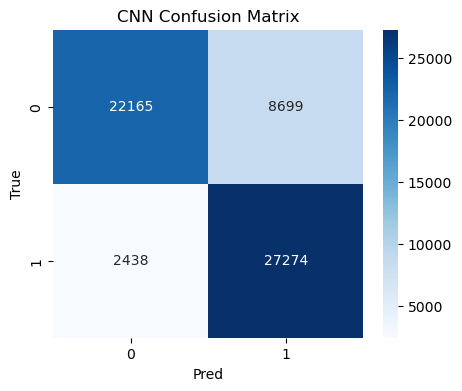

In [56]:
cm = confusion_matrix(y_true_cnn, y_pred_cnn)
plt.figure(figsize=(5,4)); 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues"); plt.title("CNN Confusion Matrix"); 
plt.xlabel("Pred"); plt.ylabel("True"); 
plt.show()



In [57]:
EPOCHS = 20
LR = 1e-3
PATIENCE = 8
torch.manual_seed(42)

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=128):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        pos = torch.arange(0, max_len).unsqueeze(1)
        div = torch.exp(torch.arange(0, d_model, 2) * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(pos * div)
        pe[:, 1::2] = torch.cos(pos * div)
        pe = pe.unsqueeze(1)
        self.register_buffer("pe", pe)
    def forward(self, x):
        T = x.size(0)
        return x + self.pe[:T]

class TransformerModel(nn.Module):
    def __init__(self, input_dim, d_model=64, nhead=4, num_layers=2, dim_ff=128, dropout=0.2):
        super().__init__()
        self.proj = nn.Linear(input_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead,
                                                   dim_feedforward=dim_ff, dropout=dropout, batch_first=False)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.posenc = PositionalEncoding(d_model)
        self.head = nn.Sequential(nn.Linear(d_model, 64), nn.ReLU(), nn.Dropout(dropout), nn.Linear(64, 1))
    def forward(self, x):  # x: (B, T, input_dim)
        x = self.proj(x)    # (B, T, d)
        x = x.transpose(0, 1)  # -> (T, B, d)
        x = self.posenc(x)
        z = self.encoder(x)    # (T, B, d)
        last = z[-1]           # (B, d)
        return self.head(last).squeeze(1)

tr = TransformerModel(input_dim=n_feat, d_model=64, nhead=4, num_layers=2, dim_ff=128, dropout=0.2)
tr, hist_tr = train_model(tr, train_loader, valid_loader, epochs=EPOCHS, lr=LR, patience=PATIENCE)


res_tr, y_true_tr, y_pred_tr, y_proba_tr = evaluate(tr, test_loader)
print("Transformer Test metrics:", res_tr)

Epoch 01: train_loss=0.5520, valid_loss=0.5333, valid_auc=0.8236355782038859
Epoch 02: train_loss=0.5020, valid_loss=0.4904, valid_auc=0.8291246060762816
Epoch 03: train_loss=0.4929, valid_loss=0.4852, valid_auc=0.835633109007694
Epoch 04: train_loss=0.4849, valid_loss=0.4627, valid_auc=0.8445687568049797
Epoch 05: train_loss=0.4785, valid_loss=0.4817, valid_auc=0.8454844061038992
Epoch 06: train_loss=0.4773, valid_loss=0.4816, valid_auc=0.8430410474559423
Epoch 07: train_loss=0.4729, valid_loss=0.4736, valid_auc=0.8413957143500977
Epoch 08: train_loss=0.4643, valid_loss=0.4610, valid_auc=0.8594683667915013
Epoch 09: train_loss=0.4580, valid_loss=0.4347, valid_auc=0.8655663104065314
Epoch 10: train_loss=0.4678, valid_loss=0.4611, valid_auc=0.8496798013558605
Epoch 11: train_loss=0.4564, valid_loss=0.4419, valid_auc=0.8605257689235829
Epoch 12: train_loss=0.4572, valid_loss=0.4353, valid_auc=0.8587951654097484
Epoch 13: train_loss=0.4579, valid_loss=0.4417, valid_auc=0.863233505367342
E

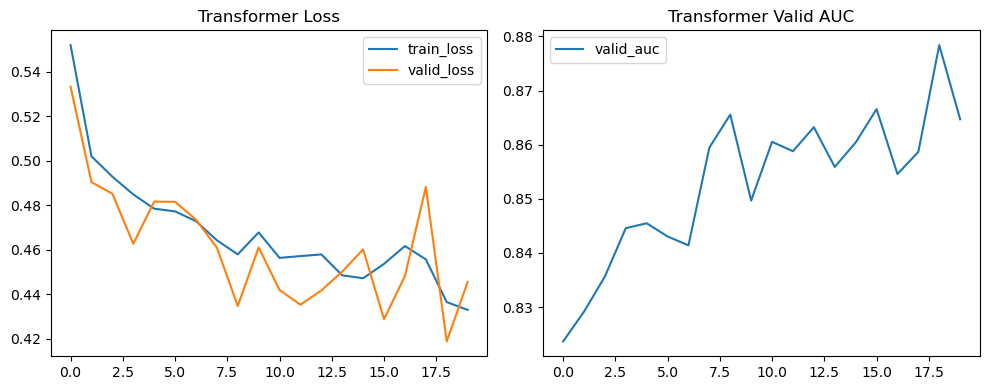

In [58]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); 
plt.plot(hist_tr["train_loss"], label="train_loss"); 
plt.plot(hist_tr["valid_loss"], label="valid_loss");
plt.title("Transformer Loss");
plt.legend()
plt.subplot(1,2,2);
plt.plot(hist_tr["valid_auc"], label="valid_auc");
plt.title("Transformer Valid AUC"); 
plt.legend()
plt.tight_layout(); plt.show()


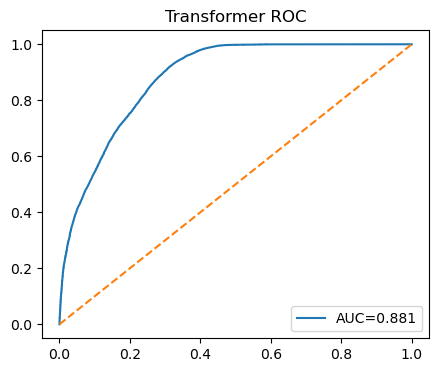

In [59]:
fpr, tpr, _ = roc_curve(y_true_tr, y_proba_tr)
plt.figure(figsize=(5,4)); 
plt.plot(fpr, tpr, label=f"AUC={res_tr['ROC AUC']:.3f}"); 
plt.plot([0,1],[0,1],'--'); 
plt.title("Transformer ROC");
plt.legend();
plt.show()


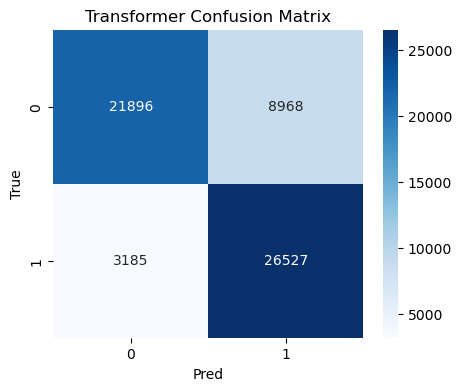

In [60]:
cm = confusion_matrix(y_true_tr, y_pred_tr)
plt.figure(figsize=(5,4)); 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues");
plt.title("Transformer Confusion Matrix"); 
plt.xlabel("Pred"); 
plt.ylabel("True");
plt.show()

In [61]:
results = {}

if "res_lstm" in globals():
    results["LSTM"] = res_lstm
if "res_cnn" in globals():
    results["CNN"] = res_cnn
if "res_tr" in globals() or "res_transformer" in globals():
    results["Transformer"] = globals().get("res_tr", globals().get("res_transformer"))

# Build DataFrame
comp_df = pd.DataFrame(results).T
print("=== Model Comparison ===")
print(comp_df.round(4))




=== Model Comparison ===
             Accuracy  Precision  Recall      F1  ROC AUC
LSTM           0.8192     0.7697  0.9012  0.8302   0.9102
CNN            0.8161     0.7582  0.9179  0.8304   0.9052
Transformer    0.7994     0.7473  0.8928  0.8136   0.8810


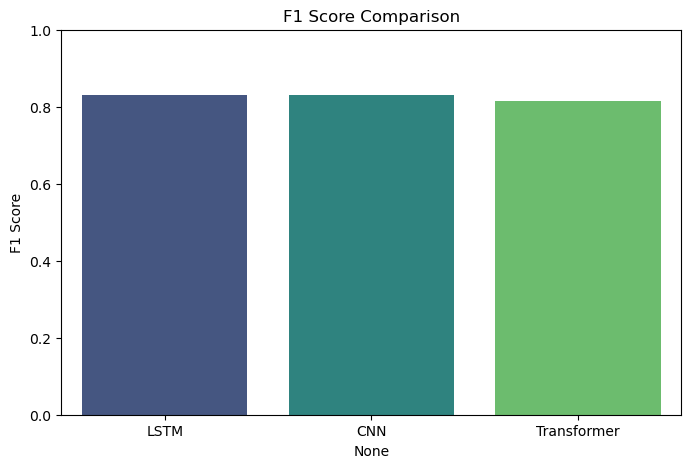

In [62]:
if "F1" in comp_df.columns:
    plt.figure(figsize=(8,5))
    sns.barplot(x=comp_df.index, y=comp_df["F1"], palette="viridis")
    plt.title("F1 Score Comparison")
    plt.ylabel("F1 Score")
    plt.ylim(0,1)
    plt.show()



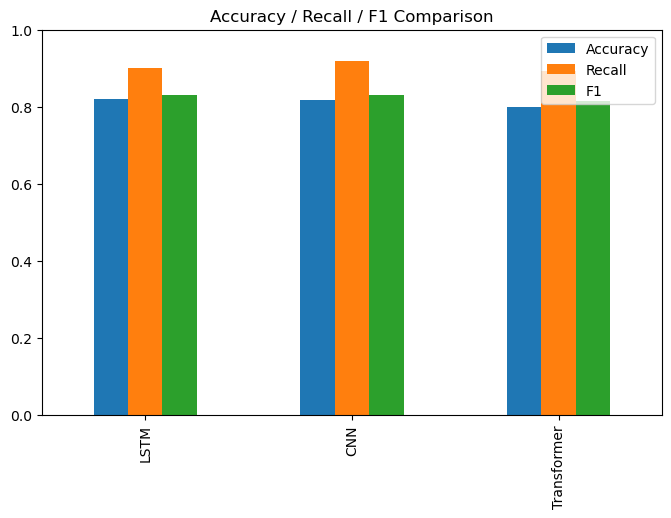

In [63]:
metrics_to_plot = [m for m in ["Accuracy","Recall","F1"] if m in comp_df.columns]
if metrics_to_plot:
    comp_df[metrics_to_plot].plot(kind="bar", figsize=(8,5))
    plt.title("Accuracy / Recall / F1 Comparison")
    plt.ylim(0,1)
    plt.show()

### Spatial and Temporal For Offence


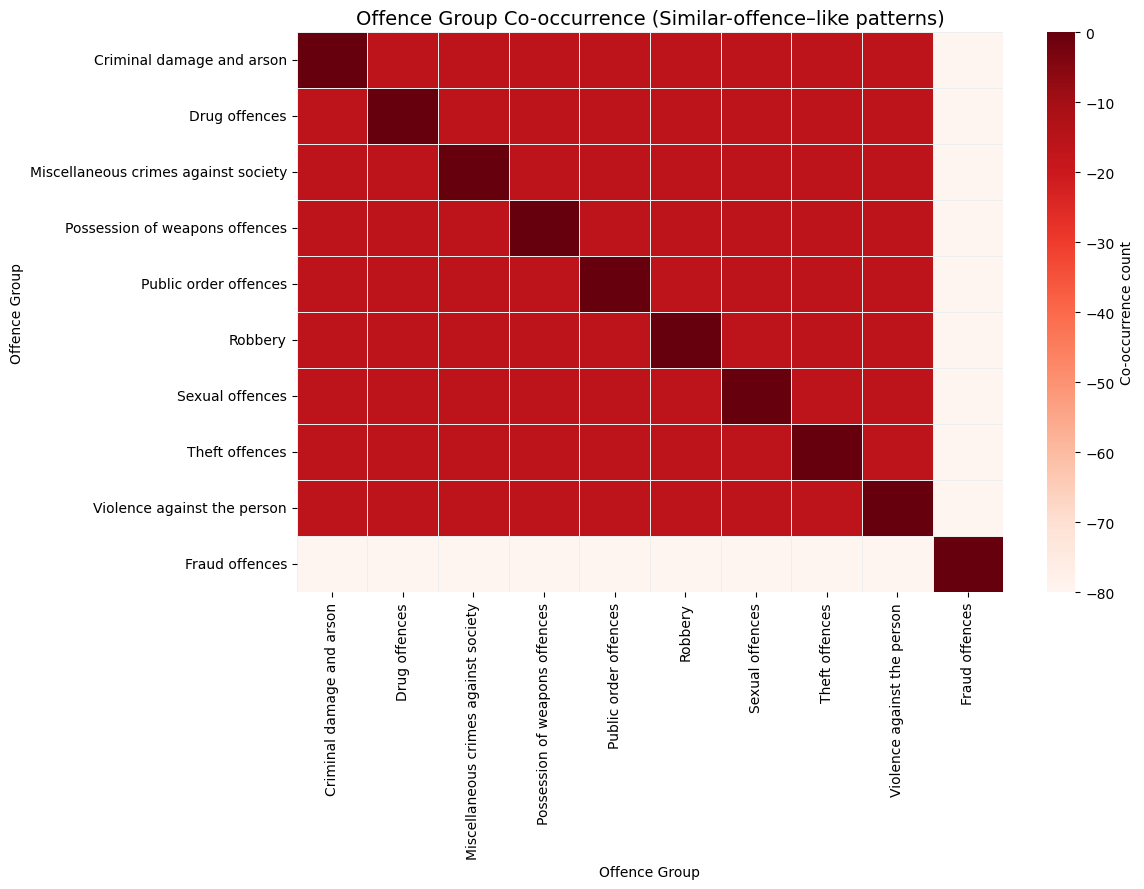

In [65]:
basket_df = (
    df_feat
    .groupby(["Force Name", "Year", "Quarter"])["Offence Group"]
    .apply(lambda s: sorted(set(s.dropna())))
    .reset_index(name="offence_list")
)

basket_df = basket_df[basket_df["offence_list"].map(len) > 0].reset_index(drop=True)

mlb = MultiLabelBinarizer()
O = pd.DataFrame(
    mlb.fit_transform(basket_df["offence_list"]),
    columns=mlb.classes_,
    index=basket_df.index
).astype(np.int8)  # compact dtype


support = O.sum(axis=0).astype(int)  

co_counts = pd.DataFrame(np.dot(O.T, O), index=O.columns, columns=O.columns).astype(int)


np.fill_diagonal(co_counts.values, 0)

top_k = 15
top_offences = support.sort_values(ascending=False).head(top_k).index

co_top = co_counts.loc[top_offences, top_offences]


matrix_to_plot = co_top


plt.figure(figsize=(12, 9))
sns.heatmap(
    matrix_to_plot,
    cmap="Reds",
    linewidths=0.5,
    linecolor="#eeeeee",
    annot=False,  
    cbar_kws={"label": "Co-occurrence count"}
)
plt.title("Offence Group Co-occurrence (Similar-offence–like patterns)", fontsize=14)
plt.xlabel("Offence Group")
plt.ylabel("Offence Group")
plt.tight_layout()
plt.show()




In [66]:
import matplotlib.pyplot as plt
gmp_df = df_feat[df_feat["Force Name"].str.contains("Manchester", case=False, na=False)]

gmp_yearly = gmp_df.groupby("Year")["Number of Offences"].sum().reset_index()

print("✅ Yearly Crime Totals - Greater Manchester:")
print(gmp_yearly)

✅ Yearly Crime Totals - Greater Manchester:
    Year  Number of Offences
0   2012              181055
1   2013              181827
2   2014              200280
3   2015              224750
4   2016              267439
5   2017              339667
6   2018              333681
7   2019              300210
8   2020              273389
9   2021              351503
10  2022              371689
11  2023              342159
12  2024              319131


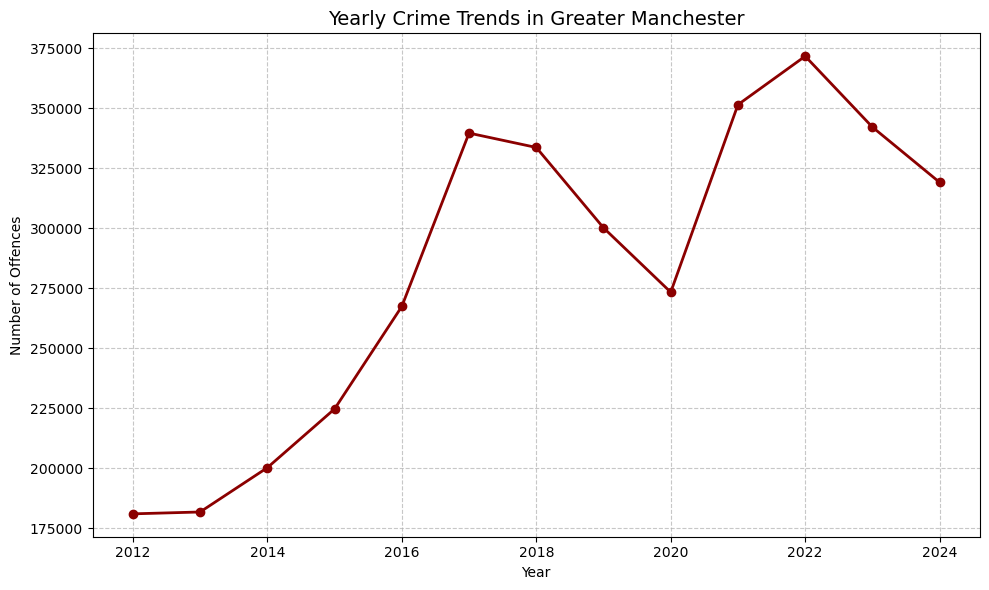

In [67]:
plt.figure(figsize=(10,6))
plt.plot(gmp_yearly["Year"], gmp_yearly["Number of Offences"], marker="o", linewidth=2, color="darkred")
plt.title("Yearly Crime Trends in Greater Manchester", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Offences")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

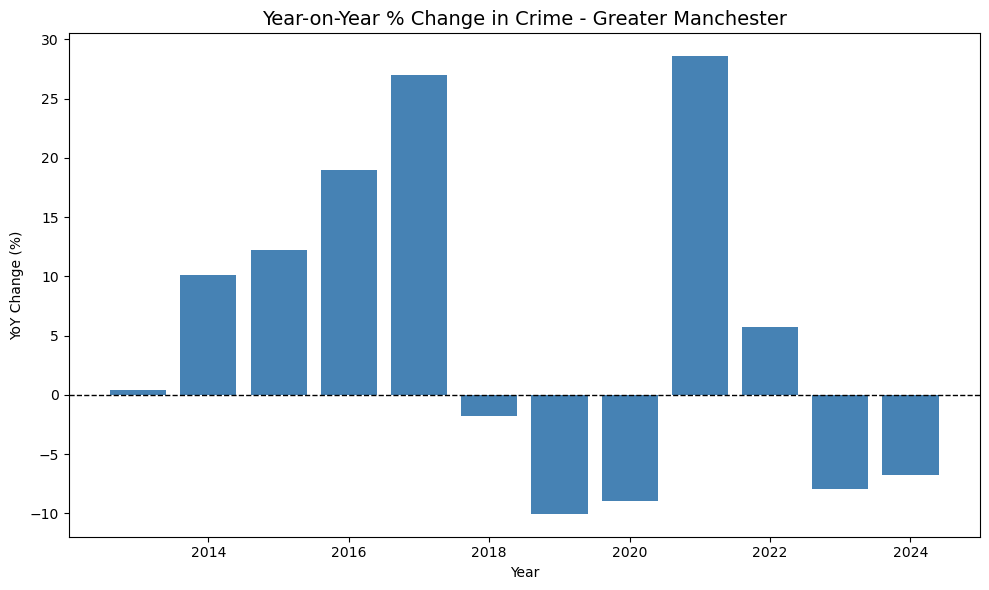

In [68]:
gmp_df = df_feat[df_feat["Force Name"].str.contains("Manchester", case=False, na=False)]


gmp_yearly = gmp_df.groupby("Year")["Number of Offences"].sum().reset_index()


gmp_yearly["YoY Change (%)"] = gmp_yearly["Number of Offences"].pct_change() * 100


plt.figure(figsize=(10,6))
plt.bar(gmp_yearly["Year"], gmp_yearly["YoY Change (%)"], color="steelblue")
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.title("Year-on-Year % Change in Crime - Greater Manchester", fontsize=14)
plt.xlabel("Year")
plt.ylabel("YoY Change (%)")
plt.tight_layout()
plt.show()


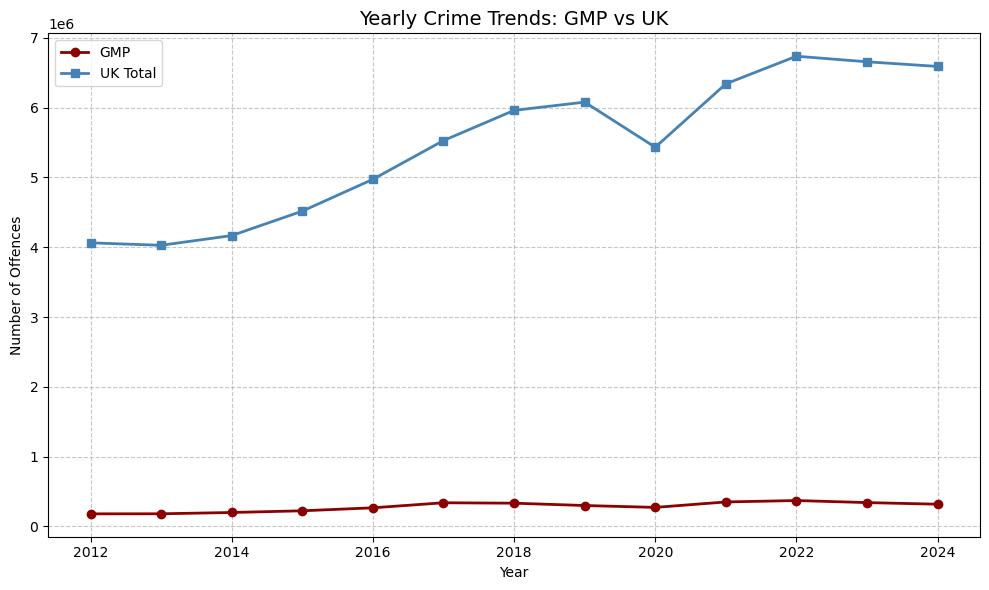

In [69]:
gmp_df = df_feat[df_feat["Force Name"].str.contains("Manchester", case=False, na=False)]
gmp_yearly = gmp_df.groupby("Year")["Number of Offences"].sum().reset_index()
gmp_yearly.rename(columns={"Number of Offences": "GMP_Offences"}, inplace=True)

uk_yearly = df_feat.groupby("Year")["Number of Offences"].sum().reset_index()
uk_yearly.rename(columns={"Number of Offences": "UK_Offences"}, inplace=True)

comparison = pd.merge(gmp_yearly, uk_yearly, on="Year")
comparison["GMP_YoY (%)"] = comparison["GMP_Offences"].pct_change() * 100
comparison["UK_YoY (%)"] = comparison["UK_Offences"].pct_change() * 100

plt.figure(figsize=(10,6))
plt.plot(comparison["Year"], comparison["GMP_Offences"], marker="o", linewidth=2, color="darkred", label="GMP")
plt.plot(comparison["Year"], comparison["UK_Offences"], marker="s", linewidth=2, color="steelblue", label="UK Total")
plt.title("Yearly Crime Trends: GMP vs UK", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Offences")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()




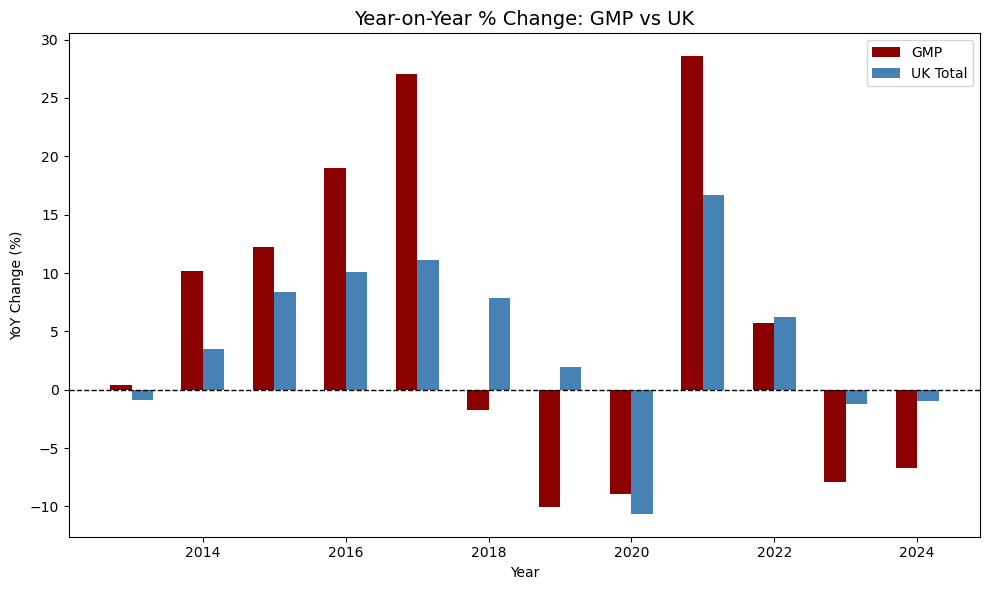

In [70]:
plt.figure(figsize=(10,6))
plt.bar(comparison["Year"]-0.15, comparison["GMP_YoY (%)"], width=0.3, color="darkred", label="GMP")
plt.bar(comparison["Year"]+0.15, comparison["UK_YoY (%)"], width=0.3, color="steelblue", label="UK Total")
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.title("Year-on-Year % Change: GMP vs UK", fontsize=14)
plt.xlabel("Year")
plt.ylabel("YoY Change (%)")
plt.legend()
plt.tight_layout()
plt.show()

In [71]:
gmp_df = df_feat[df_feat["Force Name"].str.contains("Manchester", case=False, na=False)]

gmp_offence = gmp_df.groupby("Offence Group")["Number of Offences"].sum().reset_index()
gmp_offence = gmp_offence.sort_values("Number of Offences", ascending=False)

print("✅ Top Offence Groups in Greater Manchester:")
print(gmp_offence.head(10))




✅ Top Offence Groups in Greater Manchester:
                          Offence Group  Number of Offences
8                        Theft offences             1337738
9           Violence against the person             1129400
0             Criminal damage and arson              418459
5                 Public order offences              400534
7                       Sexual offences              106322
1                         Drug offences              105898
3  Miscellaneous crimes against society               83691
6                               Robbery               65062
4        Possession of weapons offences               39017
2                        Fraud offences                 659


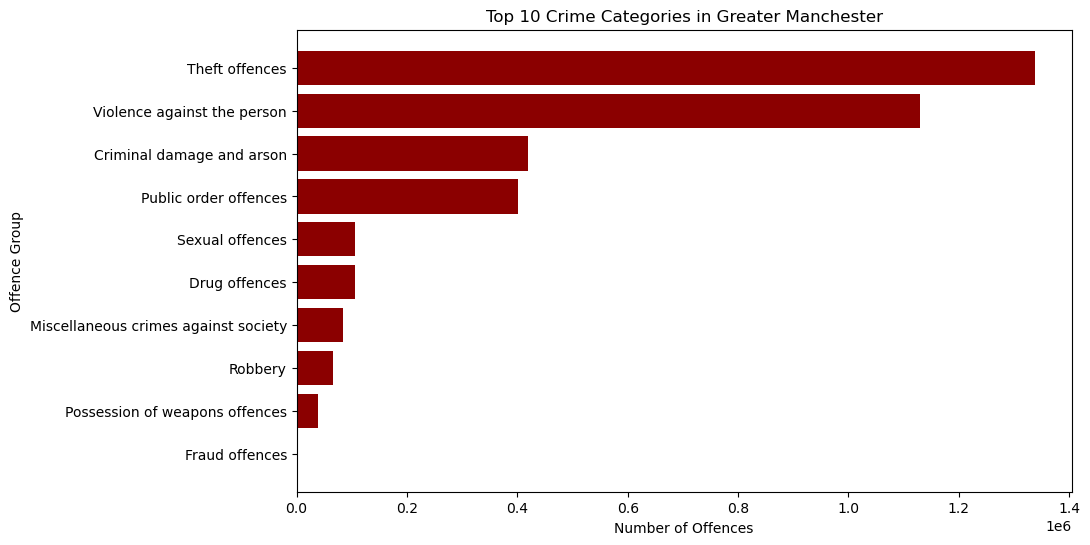

In [72]:
plt.figure(figsize=(10,6))
plt.barh(gmp_offence["Offence Group"].head(10), gmp_offence["Number of Offences"].head(10), color="darkred")
plt.gca().invert_yaxis()
plt.title("Top 10 Crime Categories in Greater Manchester")
plt.xlabel("Number of Offences")
plt.ylabel("Offence Group")
plt.show()

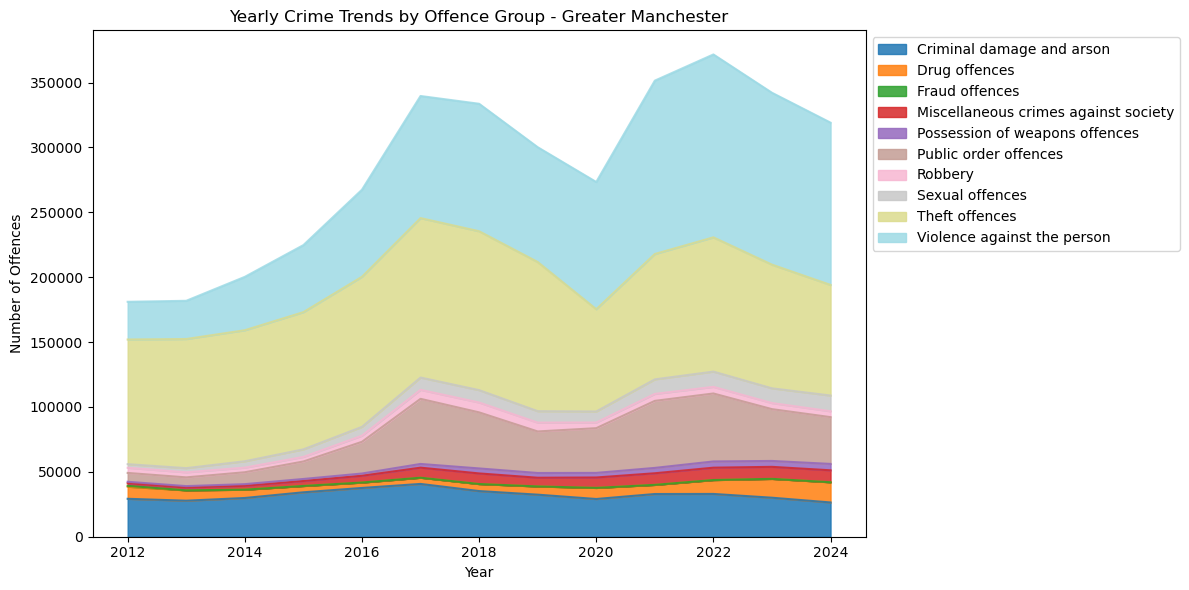

In [73]:
gmp_year_group = gmp_df.groupby(["Year","Offence Group"])["Number of Offences"].sum().reset_index()
pivot_data = gmp_year_group.pivot(index="Year", columns="Offence Group", values="Number of Offences").fillna(0)

pivot_data.plot.area(figsize=(12,6), cmap="tab20", alpha=0.85)
plt.title("Yearly Crime Trends by Offence Group - Greater Manchester")
plt.xlabel("Year")
plt.ylabel("Number of Offences")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


In [91]:
if "df_patterns" not in globals():
    raise RuntimeError("df_patterns not found. Run the feature-creation cells before these.")

df = df_patterns.copy()

gm_mask = df["Force Name"].astype(str).str.contains("Greater Manchester", case=False, na=False)
df_gm = df[gm_mask].copy()

if df_gm.empty:
    raise RuntimeError("No Greater Manchester rows found in df_patterns. Check Force Name values.")

print("Greater Manchester rows:", df_gm.shape[0])
print("Unique Offence Groups:", df_gm["Offence Group"].nunique())
print("Time span:", df_gm["Year"].min(), "to", df_gm["Year"].max())

display(df_gm.head())
df_gm = df_gm.reset_index(drop=True)


Greater Manchester rows: 6880
Unique Offence Groups: 10
Time span: 2012 to 2024


,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences,Year,Quarter,...,Lag1,Lag2,RollingMean4,Quarter_sin,Quarter_cos,crime_density,Force_enc,Group_enc,Subgroup_enc,CrimeClass
2159,2012/13,1,Greater Manchester,Abandoning child under two years (outcomes only),Violence against the person,Violence without injury,12,0,2012,1,...,0.0,0.0,0.00,1.0,6.123234e-17,303.779221,18,9,30,0
2160,2012/13,1,Greater Manchester,Absconding from lawful custody,Miscellaneous crimes against society,Miscellaneous crimes against society,80,16,2012,1,...,0.0,0.0,0.00,1.0,6.123234e-17,303.779221,18,3,12,1
2161,2012/13,1,Greater Manchester,Abuse of children through prostitution and por...,Sexual offences,Other sexual offences,71,3,2012,1,...,16.0,0.0,0.00,1.0,6.123234e-17,303.779221,18,7,14,0
2162,2012/13,1,Greater Manchester,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences,73,0,2012,1,...,3.0,16.0,4.75,1.0,6.123234e-17,303.779221,18,7,14,0
2163,2012/13,1,Greater Manchester,Actually bodily harm and other injury(outcomes...,Violence against the person,Violence with injury,8G,0,2012,1,...,0.0,3.0,4.75,1.0,6.123234e-17,303.779221,18,9,29,0


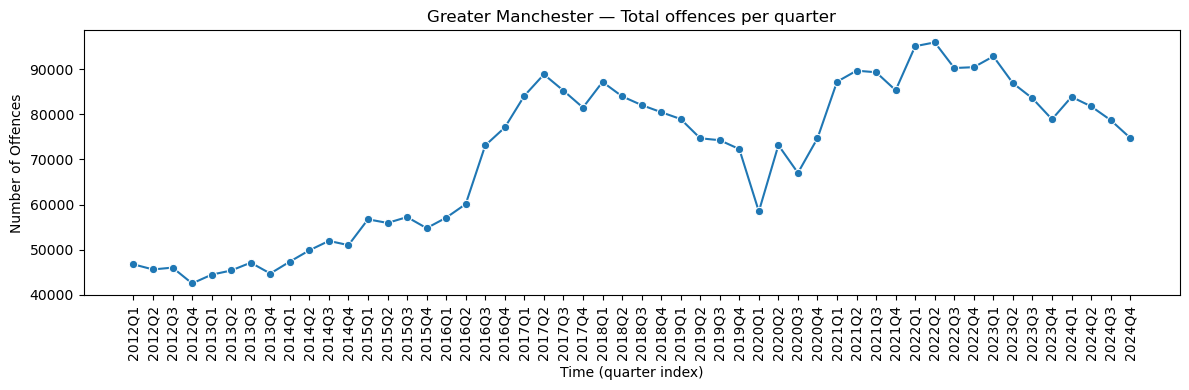

In [147]:
ts = df_gm.groupby("Year_Quarter")["Number of Offences"].sum().reset_index()
ts["Year"] = ts["Year_Quarter"].str.split("Q").str[0].astype(int)
ts["Quarter"] = ts["Year_Quarter"].str.split("Q").str[1].astype(int)
ts = ts.sort_values(["Year","Quarter"]).reset_index(drop=True)
ts["tidx"] = range(len(ts))

plt.figure(figsize=(12,4))
sns.lineplot(x="tidx", y="Number of Offences", data=ts, marker="o")
plt.title("Greater Manchester — Total offences per quarter")
plt.xlabel("Time (quarter index)"); plt.ylabel("Number of Offences")
plt.xticks(ticks=ts["tidx"], labels=ts["Year_Quarter"], rotation=90)
plt.tight_layout()
plt.show()


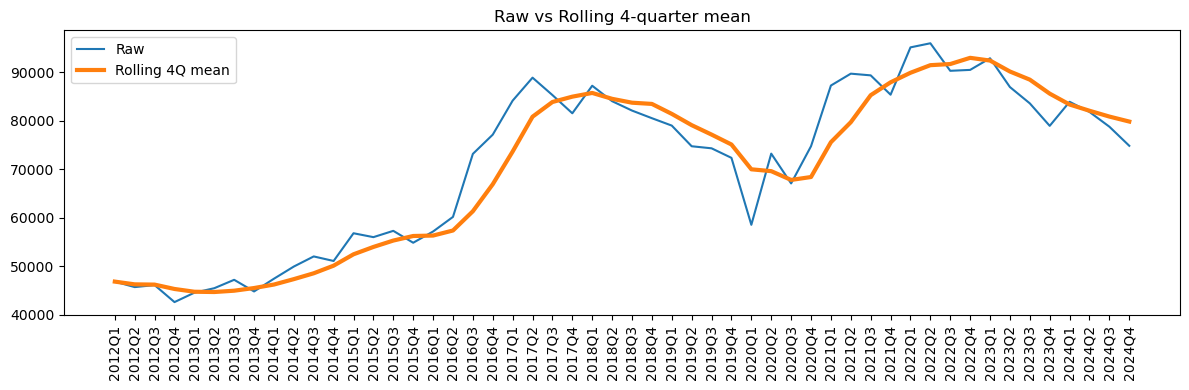

In [149]:
ts["Rolling_4Q"] = ts["Number of Offences"].rolling(4, min_periods=1).mean()
plt.figure(figsize=(12,4))
plt.plot(ts["tidx"], ts["Number of Offences"], label="Raw")
plt.plot(ts["tidx"], ts["Rolling_4Q"], label="Rolling 4Q mean", linewidth=3)
plt.title("Raw vs Rolling 4-quarter mean")
plt.xticks(ticks=ts["tidx"], labels=ts["Year_Quarter"], rotation=90)
plt.legend(); plt.tight_layout(); plt.show()

In [97]:
grp = df_gm.groupby(["Offence Group","Year_Quarter"])["Number of Offences"].sum().reset_index()
pivot = grp.pivot(index="Offence Group", columns="Year_Quarter", values="Number of Offences").fillna(0)

pivot_z = pivot.apply(lambda row: zscore(row) if row.std() != 0 else np.zeros_like(row), axis=1, result_type='expand')
pivot_z.columns = pivot.columns

Z_THRESH = 1.5
spike_locs = (pivot_z > Z_THRESH)
spike_summary = spike_locs.sum(axis=1).sort_values(ascending=False).reset_index().rename(columns={0:"num_spikes"})
spike_summary.columns = ["Offence Group","num_spikes"]
print("Offence groups with most spikes in Greater Manchester:")
display(spike_summary.head(20))



Offence groups with most spikes in Greater Manchester:


,Offence Group,num_spikes
0,Drug offences,8
1,Robbery,7
2,Criminal damage and arson,5
3,Public order offences,4
4,Theft offences,4
5,Fraud offences,2
6,Violence against the person,2
7,Possession of weapons offences,1
8,Miscellaneous crimes against society,0
9,Sexual offences,0


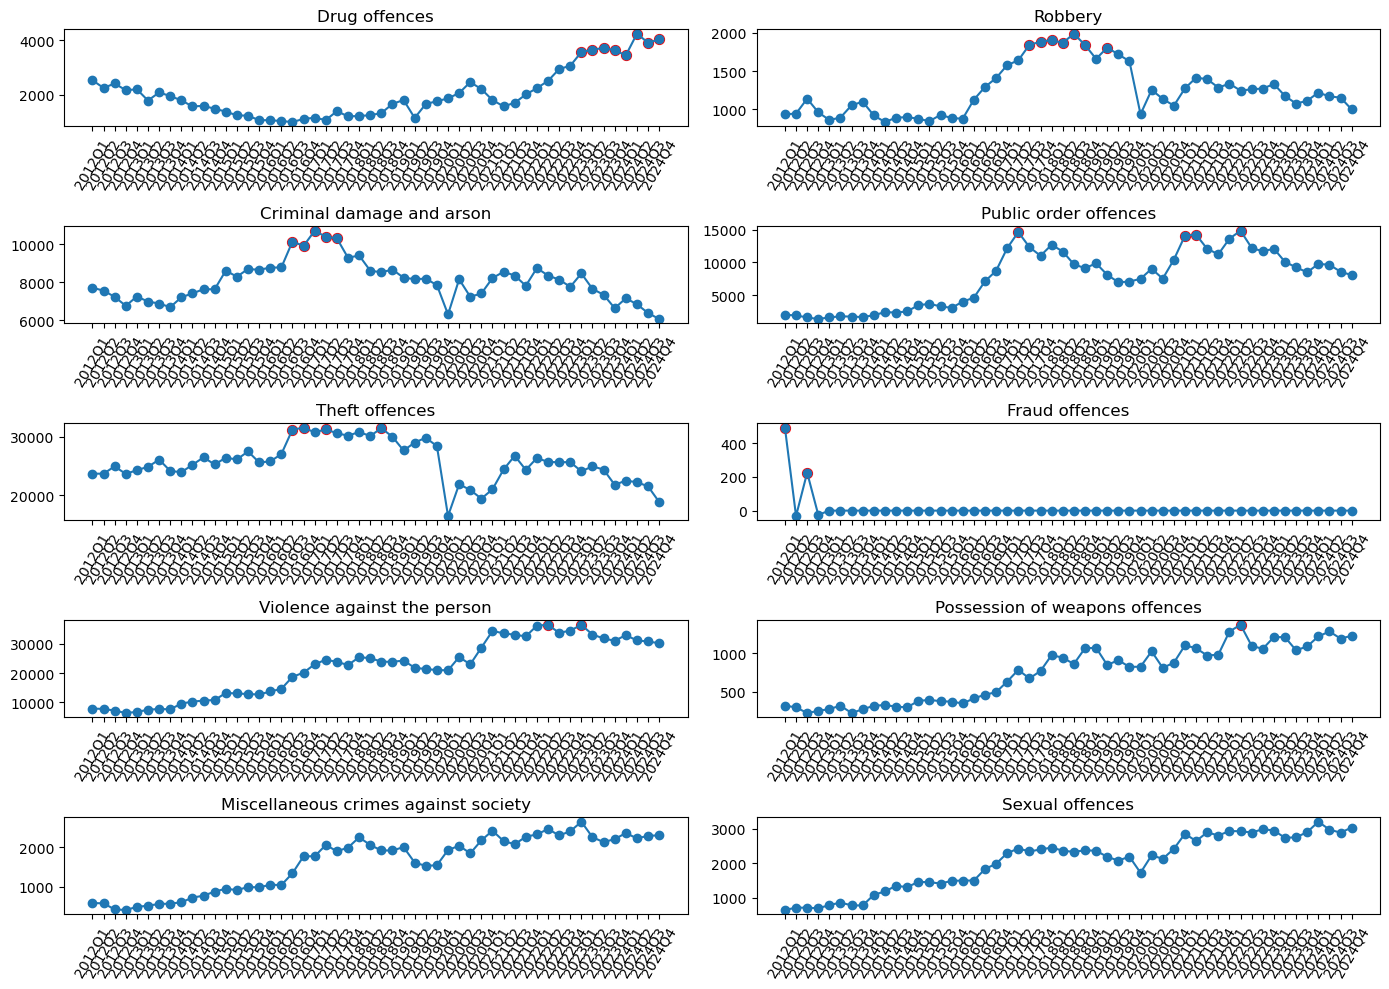

In [99]:
top10 = spike_summary.head(10)["Offence Group"].tolist()
plt.figure(figsize=(14,10))
for i, og in enumerate(top10, 1):
    plt.subplot(5,2,i)
    series = pivot.loc[og]
    idxs = series.index
    vals = series.values
    zvals = pivot_z.loc[og].values
    plt.plot(idxs, vals, marker='o')
    # highlight spikes
    for j, z in enumerate(zvals):
        if z > Z_THRESH:
            plt.scatter(idxs[j], vals[j], color='red', s=50)
    plt.title(og)
    plt.xticks(rotation=90)
plt.tight_layout(); plt.show()


Possible area-related columns found: []
No sub-area column found. Showing Offence Group totals instead.


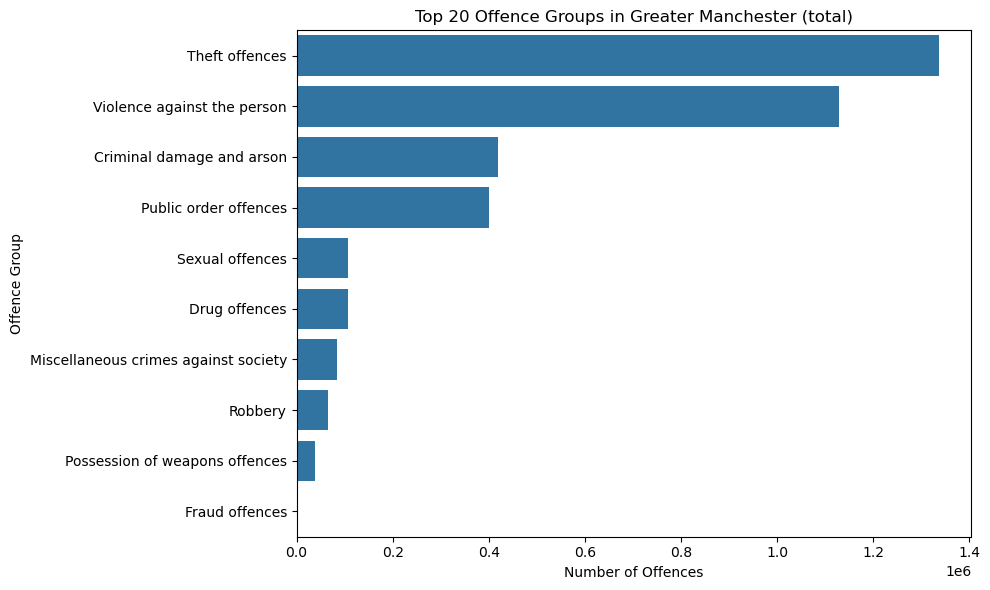

In [101]:
possible_area_cols = [c for c in df_gm.columns if any(k in c.lower() for k in ["borough","local","lsoa","ward","area","district","lat","lon","latitude","longitude","location"])]
print("Possible area-related columns found:", possible_area_cols)

if possible_area_cols:
    area_col = possible_area_cols[0]
    print("Using area column:", area_col)
    area_q = df_gm.groupby([area_col,"Year_Quarter"])["Number of Offences"].sum().reset_index()
    
    heat = area_q.pivot(index=area_col, columns="Year_Quarter", values="Number of Offences").fillna(0)
   
    top_areas = heat.sum(axis=1).sort_values(ascending=False).head(12).index
    heat_top = heat.loc[top_areas]
    plt.figure(figsize=(14,6))
    sns.heatmap(heat_top, cmap="Reds")
    plt.title(f"Top {len(top_areas)} {area_col} — offences by quarter (Greater Manchester)")
    plt.show()
else:
    print("No sub-area column found. Showing Offence Group totals instead.")
    og_totals = df_gm.groupby("Offence Group")["Number of Offences"].sum().reset_index().sort_values("Number of Offences", ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(data=og_totals.head(20), x="Number of Offences", y="Offence Group")
    plt.title("Top 20 Offence Groups in Greater Manchester (total)")
    plt.tight_layout()
    plt.show()


In [103]:
transactions = df_gm[df_gm["Number of Offences"]>0].groupby(["Year_Quarter"])["Offence Group"].apply(lambda x: list(x.unique())).reset_index()
all_items = sorted(df_gm["Offence Group"].unique())

def basket_to_ohe(items):
    return pd.Series({it: 1 if it in items else 0 for it in all_items})

ohe = transactions["Offence Group"].apply(basket_to_ohe)
min_support = max(0.01, 5/len(ohe))  # at least 5 transactions or 1%
freq = apriori(ohe, min_support=min_support, use_colnames=True)
rules = association_rules(freq, metric="lift", min_threshold=1.2).sort_values(["lift","confidence"], ascending=False)
print("Frequent itemsets (top 10):")
display(freq.sort_values("support", ascending=False).head(10))
print("Top association rules:")
display(rules.head(20))


Frequent itemsets (top 10):


,support,itemsets
0,1.0,(Criminal damage and arson)
336,1.0,"(Drug offences, Robbery, Theft offences, Misce..."
349,1.0,"(Possession of weapons offences, Drug offences..."
348,1.0,"(Possession of weapons offences, Drug offences..."
347,1.0,"(Possession of weapons offences, Drug offences..."
346,1.0,"(Possession of weapons offences, Drug offences..."
345,1.0,"(Possession of weapons offences, Drug offences..."
344,1.0,"(Drug offences, Violence against the person, T..."
343,1.0,"(Drug offences, Violence against the person, R..."
342,1.0,"(Drug offences, Violence against the person, R..."


Top association rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [115]:
df_gm = df_gm.copy()

if "tkey" not in df_gm.columns:
    # Try Year+Quarter first
    if "Year" in df_gm.columns and "Quarter" in df_gm.columns:
        df_gm["tkey"] = df_gm["Year"].astype(str) + "-Q" + df_gm["Quarter"].astype(str)
    # Else fallback to Year+Month if exists
    elif "Year" in df_gm.columns and "Month" in df_gm.columns:
        df_gm["tkey"] = df_gm["Year"].astype(str) + "-" + df_gm["Month"].astype(str)
    else:
        raise RuntimeError("No 'tkey', 'Year/Quarter', or 'Year/Month' found in df_gm. Please check dataset columns.")

pivot = (
    df_gm.groupby(["Offence Group", "tkey"])["Number of Offences"]
    .mean()
    .reset_index()
)
pivot_df = pivot.pivot(
    index="Offence Group", columns="tkey", values="Number of Offences"
).fillna(0)

X = pivot_df.values
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

pca = PCA(n_components=min(10, Xs.shape[1]))
Xr = pca.fit_transform(Xs)

K = 4
km = KMeans(n_clusters=K, random_state=42)
labels = km.fit_predict(Xr)

pivot_df["cluster"] = labels
print("Cluster sizes:", pd.Series(labels).value_counts().to_dict())





Cluster sizes: {0: 4, 1: 3, 2: 2, 3: 1}


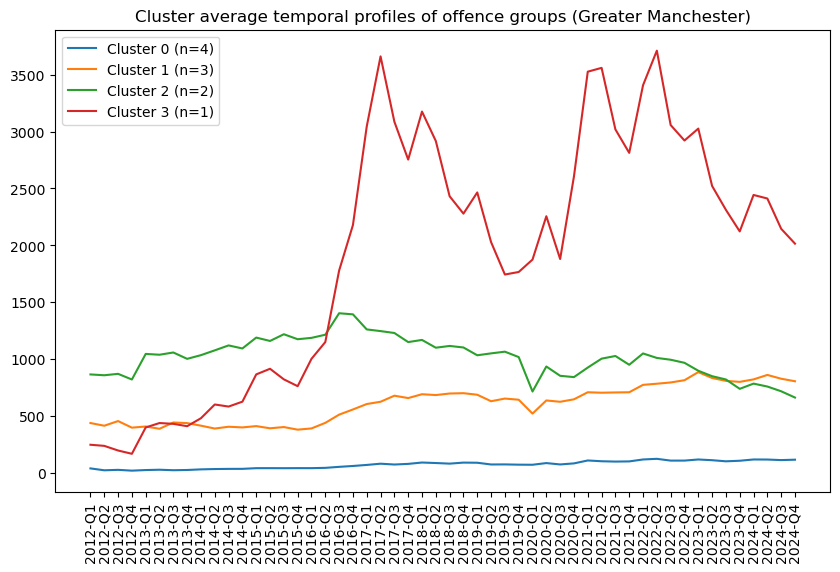

In [117]:
plt.figure(figsize=(10, 6))
for k in range(K):
    idx = pivot_df[pivot_df["cluster"] == k].index
    mean_profile = pivot_df.loc[idx].iloc[:, :-1].mean(axis=0)
    plt.plot(mean_profile.index, mean_profile.values, label=f"Cluster {k} (n={len(idx)})")

plt.legend()
plt.title("Cluster average temporal profiles of offence groups (Greater Manchester)")
plt.xticks(rotation=90)
plt.show()


Detected anomalous quarters (Greater Manchester totals):


,Year_Quarter,Number of Offences,anomaly
41,2022Q2,95925,-1
40,2022Q1,95080,-1
3,2012Q4,42560,-1


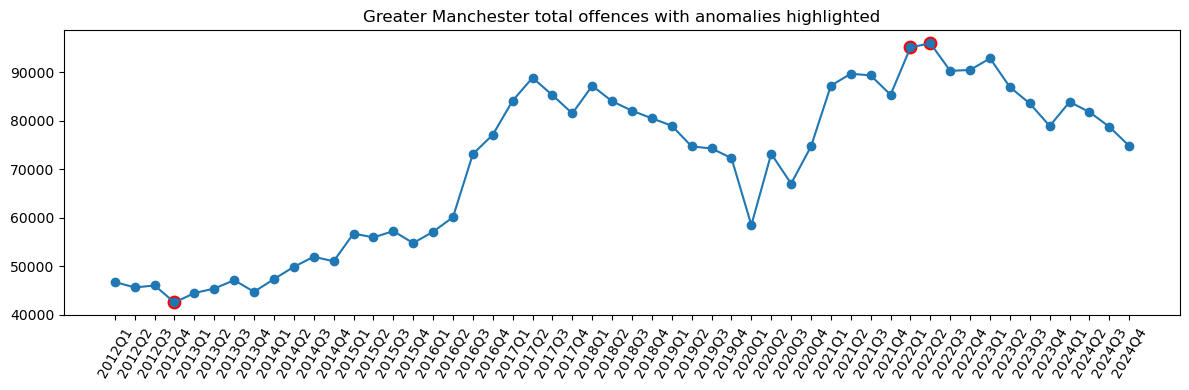

In [107]:
from sklearn.ensemble import IsolationForest

force_q = df_gm.groupby(["Year_Quarter"])["Number of Offences"].sum().reset_index()
X = force_q["Number of Offences"].values.reshape(-1,1)
iso = IsolationForest(contamination=0.05, random_state=42)
force_q["anomaly"] = iso.fit_predict(X)  # -1 = anomaly, 1 = normal
anomalies = force_q[force_q["anomaly"]==-1]
print("Detected anomalous quarters (Greater Manchester totals):")
display(anomalies.sort_values("Number of Offences", ascending=False))


plt.figure(figsize=(12,4))
plt.plot(force_q["Year_Quarter"], force_q["Number of Offences"], marker='o')
for idx, row in anomalies.iterrows():
    plt.scatter(row["Year_Quarter"], row["Number of Offences"], color='red', s=80)
plt.xticks(rotation=60); plt.title("Greater Manchester total offences with anomalies highlighted")
plt.tight_layout(); plt.show()


In [109]:
num_quarters = df_gm["Year_Quarter"].nunique()
num_offence_groups = df_gm["Offence Group"].nunique()
top_offences = df_gm.groupby("Offence Group")["Number of Offences"].sum().sort_values(ascending=False).head(10)

print("SUMMARY (Greater Manchester)")
print("---------------------------")
print(f"Time span: {df_gm['Year'].min()} to {df_gm['Year'].max()} ({num_quarters} quarters)")
print(f"Unique offence groups: {num_offence_groups}")
print("\nTop 10 offence groups (by total offences):")
print(top_offences.to_string())




SUMMARY (Greater Manchester)
---------------------------
Time span: 2012 to 2024 (52 quarters)
Unique offence groups: 10

Top 10 offence groups (by total offences):
Offence Group
Theft offences                          1337738
Violence against the person             1129400
Criminal damage and arson                418459
Public order offences                    400534
Sexual offences                          106322
Drug offences                            105898
Miscellaneous crimes against society      83691
Robbery                                   65062
Possession of weapons offences            39017
Fraud offences                              659


### Spatial and Temporal for offenders

In [119]:
offence_features = ["Force_enc", "Group_enc", "Subgroup_enc", "Year", "Quarter"]
X_offence = df_feat[offence_features].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_offence)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_feat["OffenderPatternCluster"] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2, random_state=42)
offence_pca = pca.fit_transform(X_scaled)

df_feat["PCA1"] = offence_pca[:,0]
df_feat["PCA2"] = offence_pca[:,1]

cluster_examples = df_feat.groupby("OffenderPatternCluster")["Offence Group"].unique()
print("✅ Example Offence Groups in Clusters:\n", cluster_examples)


✅ Example Offence Groups in Clusters:
 OffenderPatternCluster
0    [Sexual offences, Robbery, Public order offenc...
1    [Violence against the person, Theft offences, ...
2    [Fraud offences, Sexual offences, Theft offenc...
3    [Fraud offences, Miscellaneous crimes against ...
4    [Sexual offences, Theft offences, Robbery, Pub...
Name: Offence Group, dtype: object


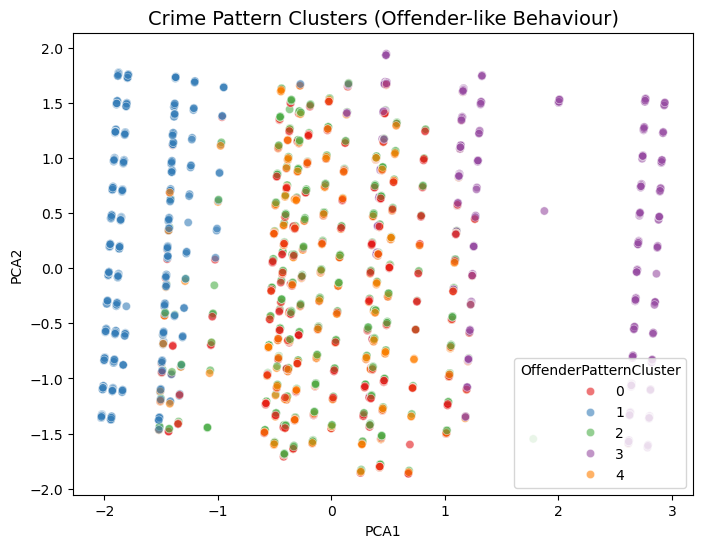

In [121]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_feat.sample(5000, random_state=42),  # sample for clarity
    x="PCA1", y="PCA2",
    hue="OffenderPatternCluster", palette="Set1", alpha=0.6
)
plt.title("Crime Pattern Clusters (Offender-like Behaviour)", fontsize=14)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

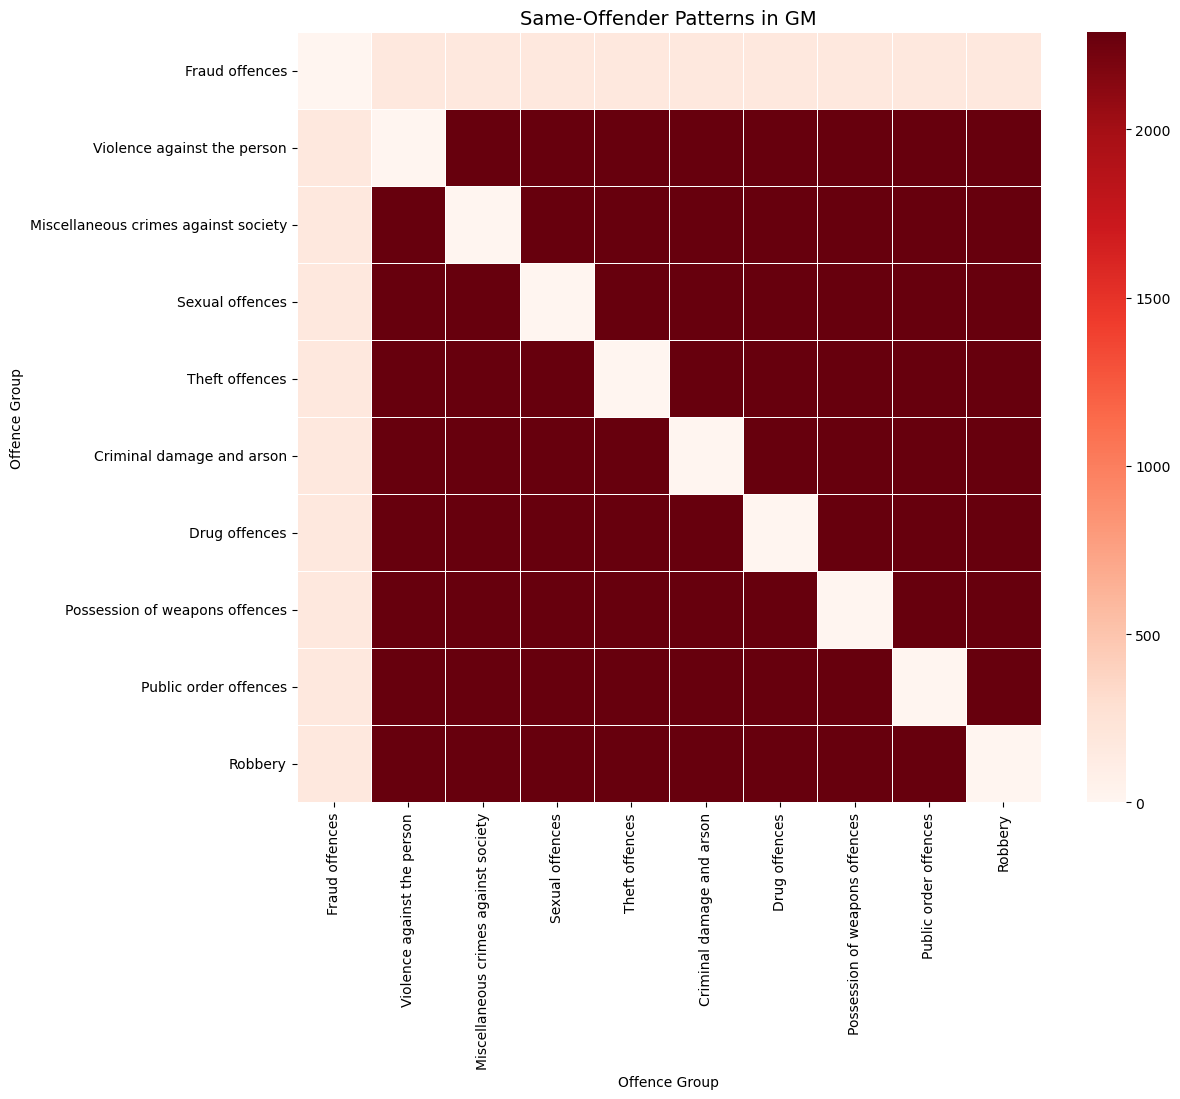

In [122]:
grouped = df_feat.groupby(["Force Name", "Year", "Quarter"])["Offence Group"].unique()

co_occurrence = pd.DataFrame(0, index=df_feat["Offence Group"].unique(), columns=df_feat["Offence Group"].unique())

for offences in grouped:
    for i in offences:
        for j in offences:
            if i != j:
                co_occurrence.loc[i, j] += 1


plt.figure(figsize=(12,10))
sns.heatmap(co_occurrence, cmap="Reds", linewidths=0.5)
plt.title("Same-Offender Patterns in GM", fontsize=14)
plt.xlabel("Offence Group")
plt.ylabel("Offence Group")
plt.show()


In [123]:
if "df_patterns" in globals():
    df = df_patterns.copy()
elif "df_feat" in globals():
    df = df_feat.copy()
else:
    raise RuntimeError("No df_patterns or df_feat found. Load your feature dataframe first.")

if "Year" not in df.columns or "Quarter" not in df.columns:
    if "Year_Quarter" in df.columns:
        df["Year"] = df["Year_Quarter"].str.split("Q").str[0].astype(int)
        df["Quarter"] = df["Year_Quarter"].str.split("Q").str[1].astype(int)
    else:
        raise RuntimeError("No Year/Quarter information found in dataframe.")

df["tkey"] = df["Year"].astype(int)*10 + df["Quarter"].astype(int)

gm_mask = df["Force Name"].astype(str).str.contains("Greater Manchester", case=False, na=False)
df_gm = df[gm_mask].copy().reset_index(drop=True)
if df_gm.empty:
    raise RuntimeError("No Greater Manchester rows found. Check 'Force Name' values.")

print("Filtered Greater Manchester rows:", df_gm.shape[0])


Filtered Greater Manchester rows: 6880


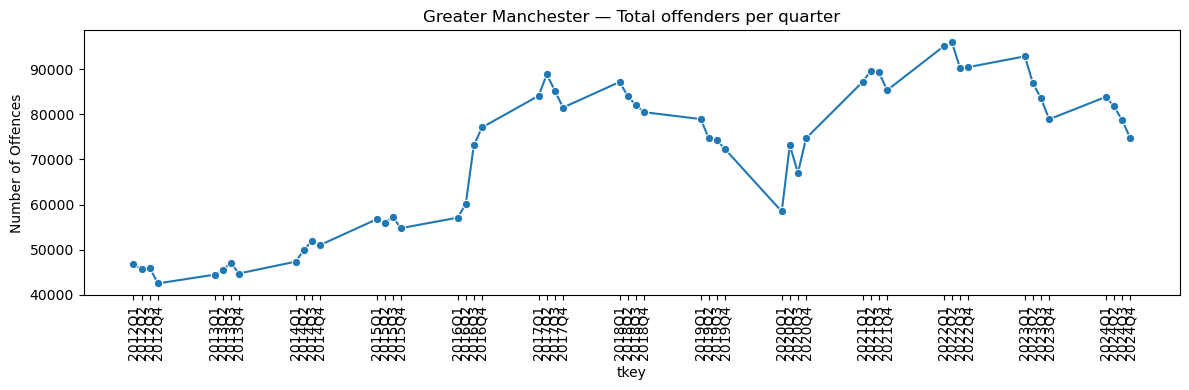

In [124]:
ts = df_gm.groupby(["Year","Quarter","Year_Quarter","tkey"])["Number of Offences"].sum().reset_index()
ts = ts.sort_values(["Year","Quarter"]).reset_index(drop=True)

plt.figure(figsize=(12,4))
sns.lineplot(x="tkey", y="Number of Offences", data=ts, marker="o")
plt.title("Greater Manchester — Total offenders per quarter")
plt.xlabel("tkey"); plt.ylabel("Number of Offences")
plt.xticks(ticks=ts["tkey"], labels=ts["Year_Quarter"], rotation=90)
plt.tight_layout(); plt.show()




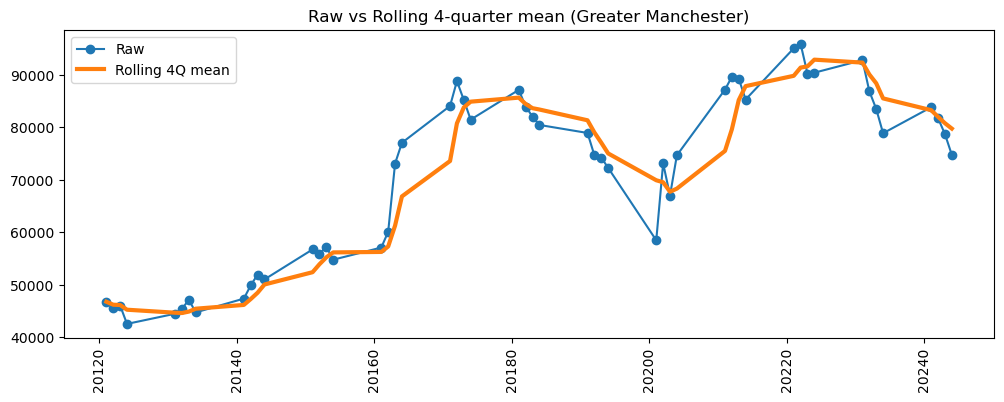

In [126]:
ts["Rolling_4Q"] = ts["Number of Offences"].rolling(4, min_periods=1).mean()
plt.figure(figsize=(12,4))
plt.plot(ts["tkey"], ts["Number of Offences"], label="Raw", marker='o')
plt.plot(ts["tkey"], ts["Rolling_4Q"], label="Rolling 4Q mean", linewidth=3)
plt.title("Raw vs Rolling 4-quarter mean (Greater Manchester)")
plt.xticks(rotation=90)
plt.legend(); plt.show()

In [128]:
grp = df_gm.groupby(["Offence Group","Year_Quarter"])["Number of Offences"].sum().reset_index()
pivot = grp.pivot(index="Offence Group", columns="Year_Quarter", values="Number of Offences").fillna(0)

pivot_z = pivot.apply(lambda row: zscore(row) if row.std()!=0 else np.zeros_like(row), axis=1, result_type='expand')
pivot_z.columns = pivot.columns

Z_THRESH = 1.5
spike_counts = (pivot_z > Z_THRESH).sum(axis=1).sort_values(ascending=False)
spike_df = spike_counts.reset_index().rename(columns={0:"num_spikes"})
spike_df.columns = ["Offence Group","num_spikes"]
print("Top offence groups by number of spikes (Greater Manchester):")
display(spike_df.head(20))



Top offence groups by number of spikes (Greater Manchester):


,Offence Group,num_spikes
0,Drug offences,8
1,Robbery,7
2,Criminal damage and arson,5
3,Public order offences,4
4,Theft offences,4
5,Fraud offences,2
6,Violence against the person,2
7,Possession of weapons offences,1
8,Miscellaneous crimes against society,0
9,Sexual offences,0


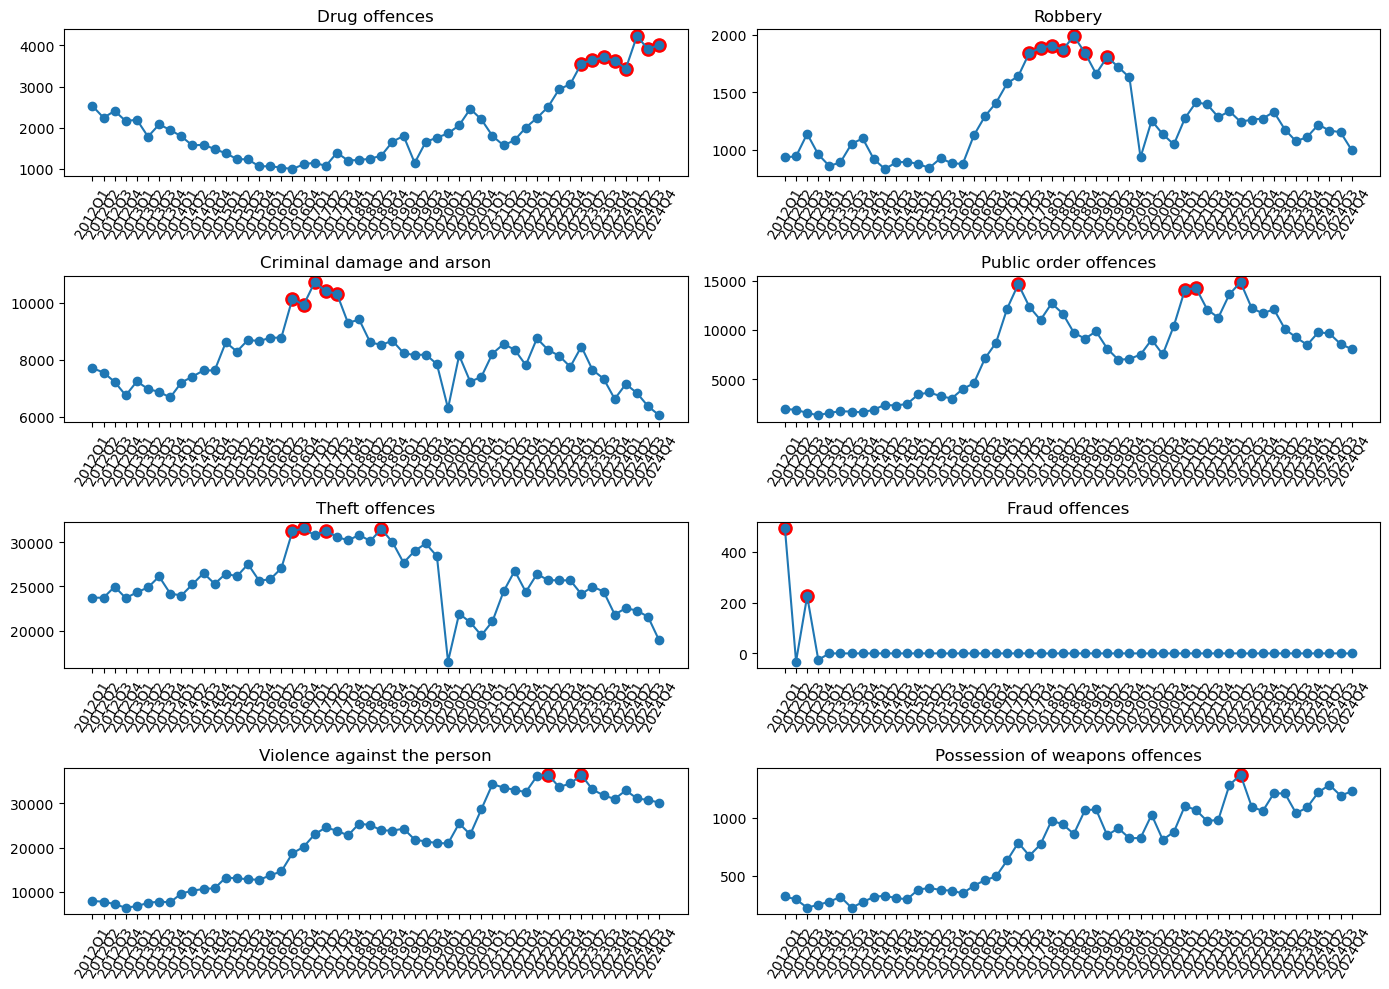

In [129]:
topk = spike_df.head(8)["Offence Group"].tolist()
plt.figure(figsize=(14,10))
for i, og in enumerate(topk, 1):
    plt.subplot(4,2,i)
    series = pivot.loc[og]
    zvals = pivot_z.loc[og]
    plt.plot(series.index, series.values, marker='o')
    for j, z in enumerate(zvals):
        if z > Z_THRESH:
            plt.scatter(series.index[j], series.values[j], color='red', s=90)
    plt.title(og)
    plt.xticks(rotation=60)
plt.tight_layout(); plt.show()


Cluster counts:


cluster
0    6
2    2
3    1
1    1
Name: count, dtype: int64

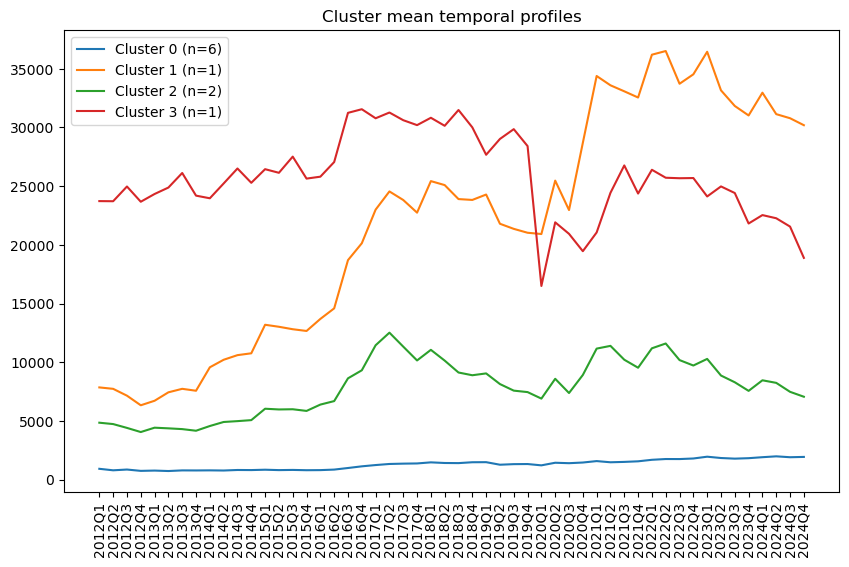

In [130]:
pivot_vals = pivot.values  # Offence groups x time
scaler = StandardScaler()
Xs = scaler.fit_transform(pivot_vals)

pca = PCA(n_components=min(10, Xs.shape[1]))
Xr = pca.fit_transform(Xs)

K = 4
km = KMeans(n_clusters=K, random_state=42)
labels = km.fit_predict(Xr)

cluster_map = pd.DataFrame({"Offence Group": pivot.index, "cluster": labels})
print("Cluster counts:")
display(cluster_map["cluster"].value_counts())

plt.figure(figsize=(10,6))
for k in range(K):
    idx = cluster_map[cluster_map["cluster"]==k]["Offence Group"].tolist()
    if len(idx)==0: continue
    mean_profile = pivot.loc[idx].mean(axis=0)
    plt.plot(mean_profile.index, mean_profile.values, label=f"Cluster {k} (n={len(idx)})")
plt.xticks(rotation=90); plt.legend(); plt.title("Cluster mean temporal profiles"); plt.show()


No fine-grained area column found. Using Force-level aggregation (Force Name).


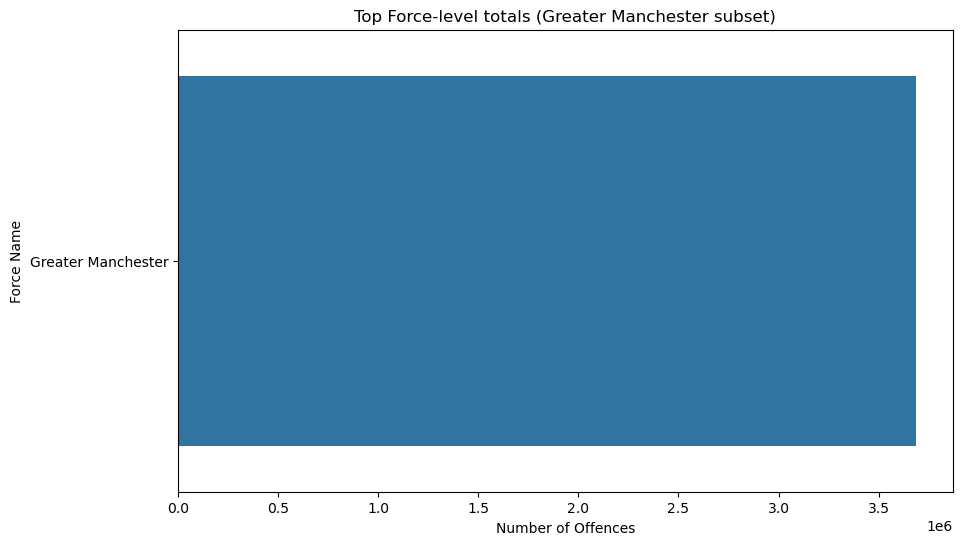

In [131]:
possible_area_cols = [c for c in df_gm.columns if any(k in c.lower() for k in ["borough","lsoa","ward","area","district","local","suburb","location"])]
if possible_area_cols:
    area_col = possible_area_cols[0]
    print("Using area column:", area_col)
    area_q = df_gm.groupby([area_col,"Year_Quarter"])["Number of Offences"].sum().reset_index()
    heat = area_q.pivot(index=area_col, columns="Year_Quarter", values="Number of Offences").fillna(0)
    top_areas = heat.sum(axis=1).sort_values(ascending=False).head(12).index
    heat_top = heat.loc[top_areas]
    plt.figure(figsize=(14,6))
    sns.heatmap(heat_top, cmap="Reds", linewidths=0.3)
    plt.title(f"Top {len(top_areas)} {area_col} — offences by quarter (Greater Manchester)")
    plt.show()
else:
    print("No fine-grained area column found. Using Force-level aggregation (Force Name).")
    force_q = df_gm.groupby(["Force Name","Year_Quarter"])["Number of Offences"].sum().reset_index()
    force_tot = force_q.groupby("Force Name")["Number of Offences"].sum().reset_index().sort_values("Number of Offences", ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(x="Number of Offences", y="Force Name", data=force_tot.head(20))
    plt.title("Top Force-level totals (Greater Manchester subset)")
    plt.show()


Top hotspot areas/forces by hotspot-quarter counts:


,Force Name,hotspot
0,Greater Manchester,0


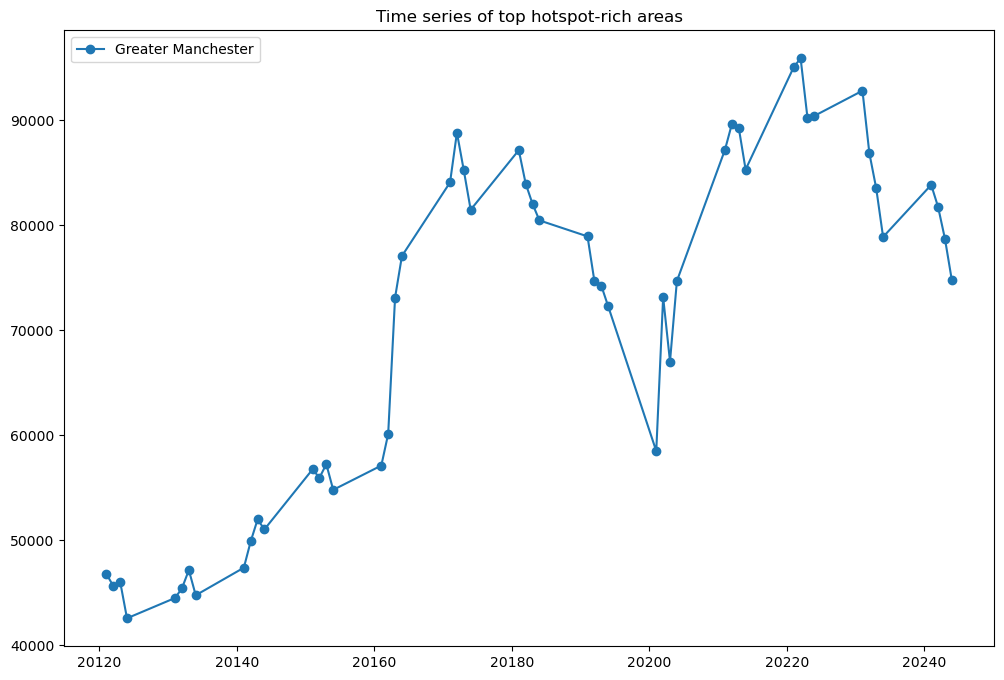

In [132]:
if possible_area_cols:
    agg_unit = area_col
else:
    agg_unit = "Force Name"

agg_q = df_gm.groupby([agg_unit,"tkey"])["Number of Offences"].sum().reset_index()
agg_q["z"] = agg_q.groupby(agg_unit)["Number of Offences"].transform(lambda x: (x - x.mean()) / (x.std() if x.std()!=0 else 1))
Z_THRESH = 1.5
agg_q["hotspot"] = (agg_q["z"] > Z_THRESH).astype(int)

hot_counts = agg_q.groupby(agg_unit)["hotspot"].sum().reset_index().sort_values("hotspot", ascending=False)
print("Top hotspot areas/forces by hotspot-quarter counts:")
display(hot_counts.head(20))

top6 = hot_counts.head(6)[agg_unit].tolist()
plt.figure(figsize=(12,8))
for name in top6:
    s = agg_q[agg_q[agg_unit]==name].sort_values("tkey")
    plt.plot(s["tkey"], s["Number of Offences"], marker='o', label=name)
plt.legend(); plt.title("Time series of top hotspot-rich areas"); plt.show()


In [133]:
dfc = df_gm.copy()

le_off = LabelEncoder()
dfc["offence_enc"] = le_off.fit_transform(dfc["Offence Group"].astype(str))

lat_cols = [c for c in dfc.columns if "lat" in c.lower()]
lon_cols = [c for c in dfc.columns if ("lon" in c.lower() or "long" in c.lower())]
if lat_cols and lon_cols:
    lat_col = lat_cols[0]; lon_col = lon_cols[0]
    Xc = dfc[[lat_col, lon_col, "tkey", "offence_enc"]].fillna(0).values.astype(float)
    Xs = StandardScaler().fit_transform(Xc)
    # DBSCAN eps needs domain tuning; start with eps=0.6 on scaled space
    clustering = DBSCAN(eps=0.6, min_samples=1, metric="euclidean", n_jobs=-1)
    labels = clustering.fit_predict(Xs)
    dfc["pseudo_offender_id"] = ["p_"+str(int(l)) for l in labels]
    print("Created pseudo_offender_id via DBSCAN; clusters:", len(np.unique(labels)))
else:
    
    Xc = dfc[["offence_enc","tkey"]].fillna(0).values.astype(float)
    Xs = StandardScaler().fit_transform(Xc)
    clustering = DBSCAN(eps=0.8, min_samples=1)
    labels = clustering.fit_predict(Xs)
    dfc["pseudo_offender_id"] = ["p_"+str(int(l)) for l in labels]
    print("No coords: pseudo_offender_id created by DBSCAN on offence/time.")


print("Sample cluster sizes (top 10):")
display(dfc["pseudo_offender_id"].value_counts().head(10))


No coords: pseudo_offender_id created by DBSCAN on offence/time.
Sample cluster sizes (top 10):


pseudo_offender_id
p_0    6880
Name: count, dtype: int64

Pseudo-offender summary (top 10):


,offender_id,n_events,first_t,last_t,unique_offences
0,p_0,6880,20121,20244,10


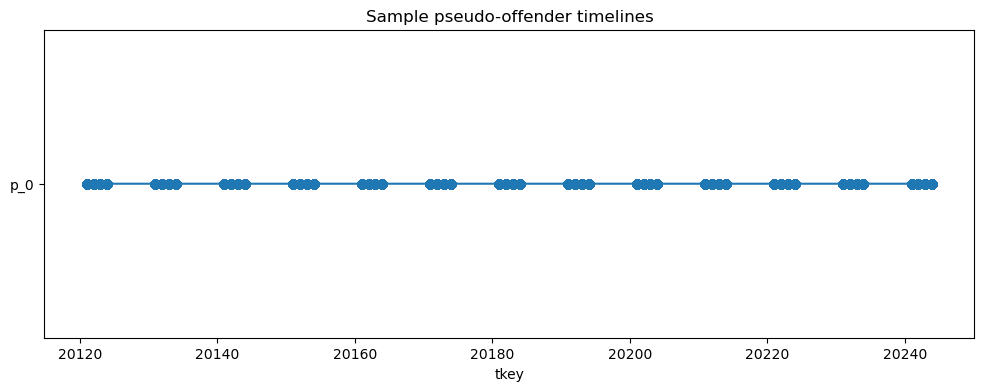

In [134]:
groups = dfc.sort_values(["pseudo_offender_id","tkey"]).groupby("pseudo_offender_id")
off_stats = []
for oid, g in groups:
    off_stats.append({
        "offender_id": oid,
        "n_events": len(g),
        "first_t": g["tkey"].min(),
        "last_t": g["tkey"].max(),
        "unique_offences": g["Offence Group"].nunique()
    })
off_df = pd.DataFrame(off_stats).sort_values("n_events", ascending=False)
print("Pseudo-offender summary (top 10):")
display(off_df.head(10))

# plot timelines for top 6
top6 = off_df.head(6)["offender_id"].tolist()
plt.figure(figsize=(12,4))
for i, oid in enumerate(top6,1):
    seq = dfc[dfc["pseudo_offender_id"]==oid].sort_values("tkey")
    plt.plot(seq["tkey"], [i]*len(seq), "o-", label=oid)
plt.yticks(range(1,len(top6)+1), top6)
plt.xlabel("tkey"); plt.title("Sample pseudo-offender timelines"); plt.show()


### Evaluation

In [151]:
ml_results = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, clf.predict(X_test)),
        "Precision": precision_score(y_test, clf.predict(X_test)),
        "Recall": recall_score(y_test, clf.predict(X_test)),
        "F1": f1_score(y_test, clf.predict(X_test)),
        "ROC AUC": roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, rf.predict(X_test)),
        "Precision": precision_score(y_test, rf.predict(X_test)),
        "Recall": recall_score(y_test, rf.predict(X_test)),
        "F1": f1_score(y_test, rf.predict(X_test)),
        "ROC AUC": roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
    },
    "XGBoost": {
        "Accuracy": accuracy_score(y_test, xgb.predict(X_test)),
        "Precision": precision_score(y_test, xgb.predict(X_test)),
        "Recall": recall_score(y_test, xgb.predict(X_test)),
        "F1": f1_score(y_test, xgb.predict(X_test)),
        "ROC AUC": roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
    },
    "Bagging": {
        "Accuracy": accuracy_score(y_test, bagging_clf.predict(X_test)),
        "Precision": precision_score(y_test, bagging_clf.predict(X_test)),
        "Recall": recall_score(y_test, bagging_clf.predict(X_test)),
        "F1": f1_score(y_test, bagging_clf.predict(X_test)),
        "ROC AUC": roc_auc_score(y_test, bagging_clf.predict_proba(X_test)[:, 1])
    }
}

ml_df = pd.DataFrame(ml_results).T

recision": ..., ...})

dl_results = {}

if "res_lstm" in globals():
    dl_results["LSTM"] = res_lstm
if "res_cnn" in globals():
    dl_results["CNN"] = res_cnn
if "res_tr" in globals() or "res_transformer" in globals():
    dl_results["Transformer"] = globals().get("res_tr", globals().get("res_transformer"))

dl_df = pd.DataFrame(dl_results).T

comparison_df = pd.concat([ml_df, dl_df], axis=0)
print("\n=== Combined Model Comparison ===")
print(comparison_df.round(4))



=== Combined Model Comparison ===
                     Accuracy  Precision  Recall      F1  ROC AUC
Logistic Regression    0.6964     0.7591  0.5581  0.6433   0.7542
Random Forest          0.8972     0.8985  0.8910  0.8947   0.9693
XGBoost                0.9205     0.9150  0.9238  0.9194   0.9784
Bagging                0.8752     0.8709  0.8754  0.8731   0.9561
LSTM                   0.8192     0.7697  0.9012  0.8302   0.9102
CNN                    0.8161     0.7582  0.9179  0.8304   0.9052
Transformer            0.7994     0.7473  0.8928  0.8136   0.8810


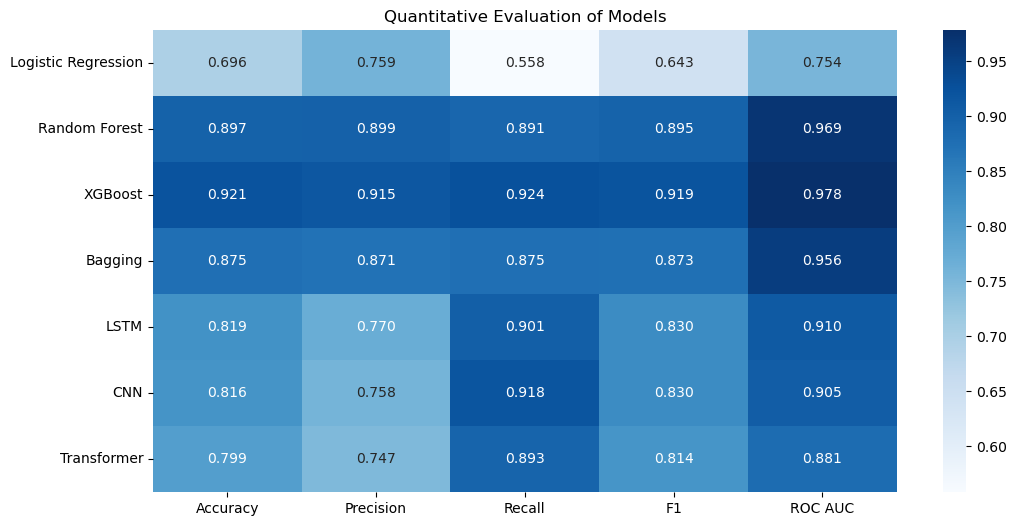

In [153]:
plt.figure(figsize=(12, 6))
sns.heatmap(comparison_df.round(3), annot=True, cmap="Blues", fmt=".3f")
plt.title("Quantitative Evaluation of Models")
plt.show()


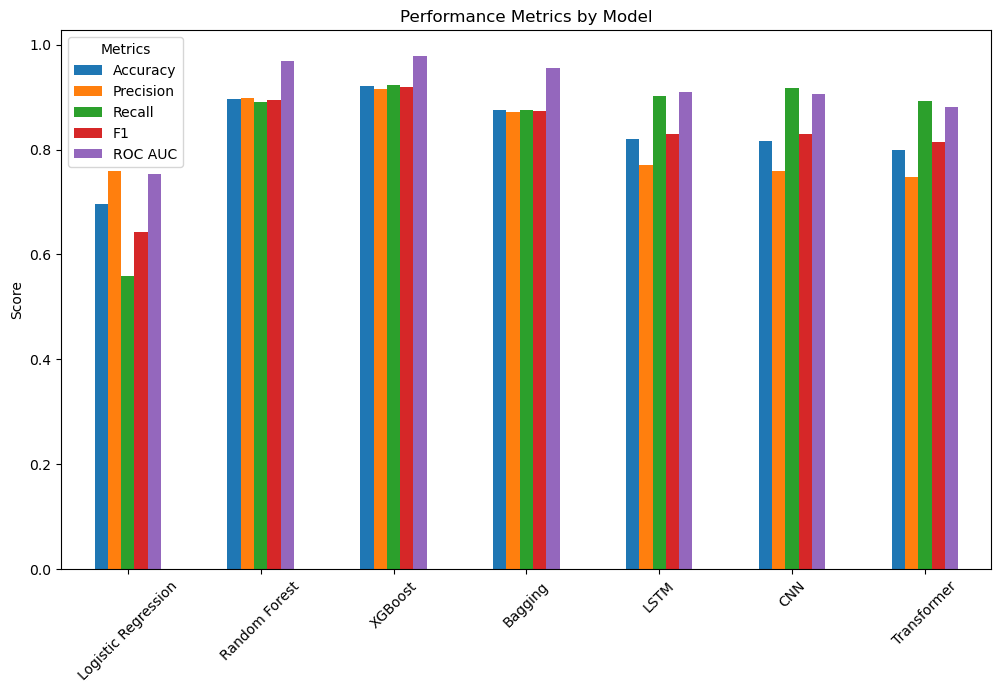

In [161]:
comparison_df.plot(kind="bar", figsize=(12, 7))
plt.title("Performance Metrics by Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.show()



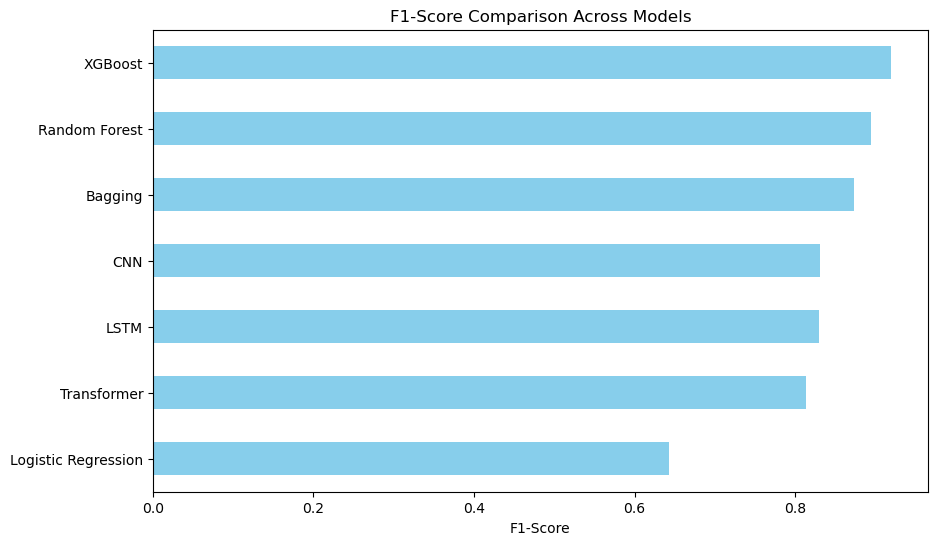

In [159]:
plt.figure(figsize=(10, 6))
comparison_df["F1"].sort_values().plot(kind="barh", color="skyblue")
plt.title("F1-Score Comparison Across Models")
plt.xlabel("F1-Score")
plt.show()



In [155]:
best_models = comparison_df.idxmax()
print("\n=== Comparative Analysis (Best Model per Metric) ===")
print(best_models)


=== Comparative Analysis (Best Model per Metric) ===
Accuracy     XGBoost
Precision    XGBoost
Recall       XGBoost
F1           XGBoost
ROC AUC      XGBoost
dtype: object
